# Import library

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy as sp
import scipy.stats as stats
import torch_optimizer as optim
import torch

import time
import os
from PIL import Image
from IPython.display import Image as Img
from IPython.display import display
from PIL import Image
import imageio
import natsort
import re
import sys
mod = sys.modules[__name__] 

from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [ ]:
from tsai.all import *
from tensorflow.python.client import device_lib

# Load data

In [ ]:
code_version = 'SISO_80t100'
net = 'TSAI'
net_type= 'TSAI_1Hz_imag'

In [ ]:
# Global path
global_path='D:/KHJ/HYUNDAI'
if os.path.exists(global_path):
    print('The directory already exists')
else:
    os.mkdir(global_path)
    
# Input data path
global_input_path_name=str(global_path)+'/Data/Training data'
if os.path.exists(global_input_path_name):
    print('The directory already exists')
else:
    os.mkdir(global_input_path_name)
    
# Result data path
global_result_path_name=str(global_path)+'/Result/'+str(net)+'/'+str(net_type)   
if os.path.exists(global_result_path_name):
    print('The directory already exists')
else:
    os.makedirs(global_result_path_name)

In [ ]:
# Global output file path
global_result_file_path =str(global_result_path_name)+'/'+str(net_type)+'_'+str(code_version)
if os.path.exists(global_result_file_path):
    print('The directory already exists')
else:
    os.mkdir(global_result_file_path)
    
# Scaler path
scaler_path=str(global_result_file_path)+'/scaler'  
if os.path.exists(scaler_path):
    print('The directory already exists')
else:
    os.mkdir(scaler_path)  
       
# loss path
loss_path=str(global_result_file_path)+'/loss'  
if os.path.exists(loss_path):
    print('The directory already exists')
else:
    os.mkdir(loss_path)

# result path
result_path=str(global_result_file_path)+'/result'  
if os.path.exists(result_path):
    print('The directory already exists')
else:
    os.mkdir(result_path)

# Data preprocessing

In [ ]:
PG_path = str(global_input_path_name)+'/PG_repeat_Aw_interp_20_hr_p'
PG_file_list = os.listdir(PG_path)
PG_file_num = len(PG_file_list) 
PG_file_list = natsort.natsorted(PG_file_list) 

PG_case_list = os.listdir(str(PG_path)+'/'+str(PG_file_list[0]))
PG_case_num = len(PG_case_list) 
PG_case_list = natsort.natsorted(PG_case_list)

print ("file_list: {}".format(PG_file_list))
print ("case_list: {}".format(PG_case_list))

## Import raw data

### XL data

In [ ]:
for i in range(PG_case_num):
    print('case : {}'.format(i+1)) 
    PG_raw_xl_path = str(PG_path)+'/'+str(PG_file_list[0])+'/'+str(PG_case_list[i])+'/XL'
    print(PG_raw_xl_path)
    PG_infile_list = os.listdir(PG_raw_xl_path)
    PG_infile_lists = natsort.natsorted(PG_infile_list)
    print(PG_infile_lists)
    k = 0
    m = 0
    for j in range(2): # 1:real, 2:imag
        if np.mod(j+1,2)==1: 
            k = k+1
            print(k)
            print('odd')
            print("Case index is :{}, and data type is imaginary".format(i+1))
            setattr(mod, 'xl_{}case_{}ch_{}_interp_raw'.format(i+1,k,2), np.loadtxt(str(PG_raw_xl_path)+'/'+str(PG_infile_lists[j]),delimiter=",").T) # 지정 객체의 속성 값 설정, setattr(object,name,value) object에 존재하는 name에 value를 결정한다.
            print(str(PG_raw_xl_path)+'/'+str(PG_infile_lists[j]))
            print("Data : {}, shape : {}".format(globals()['xl_{}case_{}ch_{}_interp_raw'.format(i+1,k,2)],
                                                           globals()['xl_{}case_{}ch_{}_interp_raw'.format(i+1,k,2)].shape))
        elif np.mod(j+1,2)==0: 
            m = m+1
            print(m)
            print('even')
            print("Case index is :{}, and data type is real".format(i+1))
            setattr(mod, 'xl_{}case_{}ch_{}_interp_raw'.format(i+1,m,1), np.loadtxt(str(PG_raw_xl_path)+'/'+str(PG_infile_lists[j]),delimiter=",").T)
            print(str(PG_raw_xl_path)+'/'+str(PG_infile_lists[j]))
            print("Data : {}, shape : {}".format(globals()['xl_{}case_{}ch_{}_interp_raw'.format(i+1,m,1)],
                                                           globals()['xl_{}case_{}ch_{}_interp_raw'.format(i+1,m,1)].shape))

In [ ]:
xl_channel = 1
latent_xl_channel = 1

#### XL data real part

In [ ]:
for i in range(xl_channel): 
    xl_data = np.empty((0,xl_1case_1ch_1_interp_raw.shape[1]),int)
    for j in range(PG_case_num): 
        print("{}ch {}case".format(i+1,j+1))
        xl_datas = globals()['xl_{}case_{}ch_{}_interp_raw'.format(j+1,i+1,1)]
        xl_data = np.append(xl_data, xl_datas, axis=0)   
    setattr(mod, 'xl_allcase_{}ch_real_interp_raw'.format(i+1), np.array(xl_data))
    print("Data shape : {}".format(globals()['xl_allcase_{}ch_real_interp_raw'.format(i+1)].shape))

In [ ]:
xl_data = np.empty((0,xl_1case_1ch_1_interp_raw.shape[1]),int)
for i in range(xl_channel): 
    print("{}ch".format(i+1))
    xl_datas = globals()['xl_allcase_{}ch_real_interp_raw'.format(i+1)]
    xl_data = np.append(xl_data, xl_datas, axis=0)
xl_allcase_allch_real_interp_raw = np.array(xl_data)
print("Data shape : {}".format(xl_allcase_allch_real_interp_raw.shape))

#### XL data imaginary part

In [ ]:
for i in range(xl_channel): 
    xl_data = np.empty((0,xl_1case_1ch_2_interp_raw.shape[1]),int)
    for j in range(PG_case_num): 
        print("{}ch {}case".format(i+1,j+1))
        xl_datas = globals()['xl_{}case_{}ch_{}_interp_raw'.format(j+1,i+1,2)] 
        xl_data = np.append(xl_data, xl_datas, axis=0)
    setattr(mod, 'xl_allcase_{}ch_imag_interp_raw'.format(i+1), np.array(xl_data)) 
    print("Data shape : {}".format(globals()['xl_allcase_{}ch_imag_interp_raw'.format(i+1)].shape))

In [ ]:
xl_data = np.empty((0,xl_1case_1ch_2_interp_raw.shape[1]),int)
for i in range(xl_channel): 
    print("{}ch".format(i+1))
    xl_datas = globals()['xl_allcase_{}ch_imag_interp_raw'.format(i+1)]
    xl_data = np.append(xl_data, xl_datas, axis=0)   
xl_allcase_allch_imag_interp_raw = np.array(xl_data)
print("Data shape : {}".format(xl_allcase_allch_imag_interp_raw.shape))

### MIC data

In [ ]:
for i in range(PG_case_num):
    print('case : {}'.format(i+1))
    PG_raw_mic_path = str(PG_path)+'/'+str(PG_file_list[0])+'/'+str(PG_case_list[i])+'/MIC'
    print(PG_raw_mic_path)
    PG_infile_list = os.listdir(PG_raw_mic_path)
    PG_infile_lists = natsort.natsorted(PG_infile_list)
    print(PG_infile_lists)
    k = 0
    m = 0
    for j in range(2): # 1:real, 2:imag
        if np.mod(j+1,2)==1: 
            k = k+1
            print(k)
            print('odd')
            print("Case index is :{}, and data type is imaginary".format(i+1))
            setattr(mod, 'mic_{}case_{}ch_{}_interp_raw'.format(i+1,k,2), np.loadtxt(str(PG_raw_mic_path)+'/'+str(PG_infile_lists[j]),delimiter=",").T)
            print(str(PG_raw_mic_path)+'/'+str(PG_infile_lists[j]))
            print("Data : {}, shape : {}".format(globals()['mic_{}case_{}ch_{}_interp_raw'.format(i+1,k,2)],
                                                           globals()['mic_{}case_{}ch_{}_interp_raw'.format(i+1,k,2)].shape))
        elif np.mod(j+1,2)==0: 
            m = m+1
            print(m)
            print('even')
            print("Case index is :{}, and data type is real".format(i+1))
            setattr(mod, 'mic_{}case_{}ch_{}_interp_raw'.format(i+1,m,1), np.loadtxt(str(PG_raw_mic_path)+'/'+str(PG_infile_lists[j]),delimiter=",").T)
            print(str(PG_raw_mic_path)+'/'+str(PG_infile_lists[j]))
            print("Data : {}, shape : {}".format(globals()['mic_{}case_{}ch_{}_interp_raw'.format(i+1,m,1)],
                                                           globals()['mic_{}case_{}ch_{}_interp_raw'.format(i+1,m,1)].shape))

In [ ]:
mic_channel = 1
latent_mic_channel = 1

#### MIC data real part

In [ ]:
for i in range(mic_channel):
    mic_data = np.empty((0,mic_1case_1ch_1_interp_raw.shape[1]),int)
    for j in range(PG_case_num): 
        print("{}ch {}case".format(i+1,j+1))
        mic_datas = globals()['mic_{}case_{}ch_{}_interp_raw'.format(j+1,i+1,1)]
        mic_data = np.append(mic_data, mic_datas, axis=0)
    setattr(mod, 'mic_allcase_{}ch_real_interp_raw'.format(i+1), np.array(mic_data))
    print("Data shape : {}".format(globals()['mic_allcase_{}ch_real_interp_raw'.format(i+1)].shape))

In [ ]:
mic_data = np.empty((0,mic_1case_1ch_1_interp_raw.shape[1]),int)
for i in range(mic_channel):
    print("{}ch".format(i+1))
    mic_datas = globals()['mic_allcase_{}ch_real_interp_raw'.format(i+1)]
    mic_data = np.append(mic_data, mic_datas, axis=0)   
mic_allcase_allch_real_interp_raw = np.array(mic_data)
print("Data shape : {}".format(mic_allcase_allch_real_interp_raw.shape))

#### MIC data imaginary part

In [ ]:
for i in range(mic_channel): 
    mic_data = np.empty((0,mic_1case_1ch_2_interp_raw.shape[1]),int)
    for j in range(PG_case_num): 
        print("{}ch {}case".format(i+1,j+1))
        mic_datas = globals()['mic_{}case_{}ch_{}_interp_raw'.format(j+1,i+1,2)]
        mic_data = np.append(mic_data, mic_datas, axis=0)   
    setattr(mod, 'mic_allcase_{}ch_imag_interp_raw'.format(i+1), np.array(mic_data))
    print("Data shape : {}".format(globals()['mic_allcase_{}ch_imag_interp_raw'.format(i+1)].shape))      

In [ ]:
mic_data = np.empty((0,mic_1case_1ch_2_interp_raw.shape[1]),int)
for i in range(mic_channel): 
    print("{}ch".format(i+1))
    mic_datas = globals()['mic_allcase_{}ch_imag_interp_raw'.format(i+1)]
    mic_data = np.append(mic_data, mic_datas, axis=0)   
mic_allcase_allch_imag_interp_raw = np.array(mic_data)
print("Data shape : {}".format(mic_allcase_allch_imag_interp_raw.shape))

## Define scaler

### Scaler : XL real

In [ ]:
xl_allcase_allch_real_interp_scaler = MinMaxScaler(feature_range=(0,1)) 
xl_allcase_allch_real_interp_scaler.fit(xl_allcase_allch_real_interp_raw)
std_data = np.array([xl_allcase_allch_real_interp_scaler.data_min_,xl_allcase_allch_real_interp_scaler.data_max_])
print("xl real MinMaxScaler : {}, shape : {}".format(std_data,std_data.shape)) 
np.savetxt(str(scaler_path)+'/MinMaxScaler_xl_allch_real_interp.dat',std_data,delimiter=",")

### Scaler : XL imag

In [ ]:
xl_allcase_allch_imag_interp_scaler = MinMaxScaler(feature_range=(0,1))
xl_allcase_allch_imag_interp_scaler.fit(xl_allcase_allch_imag_interp_raw)
std_data = np.array([xl_allcase_allch_imag_interp_scaler.data_min_,xl_allcase_allch_imag_interp_scaler.data_max_])
print("xl imag MinMaxScaler : {}, shape : {}".format(std_data,std_data.shape))
np.savetxt(str(scaler_path)+'/MinMaxScaler_xl_allch_imag_interp.dat',std_data,delimiter=",")

### Scaler : MIC real

In [ ]:
mic_allcase_allch_real_interp_scaler = MinMaxScaler(feature_range=(0,1))
mic_allcase_allch_real_interp_scaler.fit(mic_allcase_allch_real_interp_raw)
std_data = np.array([mic_allcase_allch_real_interp_scaler.data_min_,mic_allcase_allch_real_interp_scaler.data_max_])
print("mic real MinMaxScaler : {}, shape : {}".format(std_data,std_data.shape))
np.savetxt(str(scaler_path)+'/MinMaxScaler_mic_allch_real_interp.dat',std_data,delimiter=",")

### Scaler : MIC imag

In [ ]:
mic_allcase_allch_imag_interp_scaler = MinMaxScaler(feature_range=(0,1))
mic_allcase_allch_imag_interp_scaler.fit(mic_allcase_allch_imag_interp_raw) 
std_data = np.array([mic_allcase_allch_imag_interp_scaler.data_min_,mic_allcase_allch_imag_interp_scaler.data_max_])
print("mic imag MinMaxScaler : {}, shape : {}".format(std_data,std_data.shape))
np.savetxt(str(scaler_path)+'/MinMaxScaler_mic_allch_imag_interp.dat',std_data,delimiter=",")

## Data Scaling

### Scaling (XL)

In [ ]:
for i in range(PG_case_num): 
    print('case : {}'.format(i+1))
    for j in range(xl_channel):
        for k in range(2):
            if k+1==1:
                setattr(mod,'xl_{}case_{}ch_{}_interp'.format(i+1,j+1,1), xl_allcase_allch_real_interp_scaler.transform(globals()['xl_{}case_{}ch_{}_interp_raw'.format(i+1,j+1,1)])) 
            elif k+1==2:
                setattr(mod,'xl_{}case_{}ch_{}_interp'.format(i+1,j+1,2), xl_allcase_allch_imag_interp_scaler.transform(globals()['xl_{}case_{}ch_{}_interp_raw'.format(i+1,j+1,2)]))  

### Scaling (MIC)

In [ ]:
for i in range(PG_case_num): 
    print('case : {}'.format(i+1))
    for j in range(mic_channel): 
        for k in range(2):
            if k+1==1:
                setattr(mod,'mic_{}case_{}ch_{}_interp'.format(i+1,j+1,1), mic_allcase_allch_real_interp_scaler.transform(globals()['mic_{}case_{}ch_{}_interp_raw'.format(i+1,j+1,1)]))
            elif k+1==2:
                setattr(mod,'mic_{}case_{}ch_{}_interp'.format(i+1,j+1,2), mic_allcase_allch_imag_interp_scaler.transform(globals()['mic_{}case_{}ch_{}_interp_raw'.format(i+1,j+1,2)]))

## Data split

In [ ]:
#TSAI
window=10
future_window=10
strides = 1
freq_input = 21
freq_output = 21

In [ ]:
training_data_index = np.array([1,2,3,4,5,6,8,9,10,11])
testing_data_index = np.array([7])

### XL data

In [ ]:
for i in range(xl_channel):
    xl_x_train,xl_y_train = np.empty((0,freq_input,window), int),np.empty((0,freq_input,future_window), int)

    for j in training_data_index: 
        data = globals()['xl_{}case_{}ch_{}_interp'.format(j,i+1,2)][:,60:81] 
        xl_x_datas, xl_y_datas = SlidingWindow(window, stride=strides, horizon=future_window)(data)
        check_data(xl_x_datas,xl_y_datas)
        xl_x_train, xl_y_train = np.append(xl_x_train,xl_x_datas,axis=0), np.append(xl_y_train,xl_y_datas,axis=0)
    
    setattr(mod,'xl_x_{}ch_imag_train_interp'.format(i+1), np.array(xl_x_train))
    setattr(mod,'xl_y_{}ch_imag_train_interp'.format(i+1), np.array(xl_y_train))
    
print('(interp)Training data input: {}, output: {}'.format(xl_x_1ch_imag_train_interp.shape,xl_y_1ch_imag_train_interp.shape))

In [ ]:
for i in range(xl_channel):
    for j in training_data_index: 
        xl_x_train,xl_y_train = np.empty((0,freq_input,window), int),np.empty((0,freq_input,future_window), int)
        data = globals()['xl_{}case_{}ch_{}_interp'.format(j,i+1,2)][:,60:81]
        xl_x_datas, xl_y_datas = SlidingWindow(window, stride=window, horizon=future_window)(data)
        check_data(xl_x_datas,xl_y_datas)
        xl_x_train, xl_y_train = np.append(xl_x_train,xl_x_datas,axis=0), np.append(xl_y_train,xl_y_datas,axis=0)
      
        setattr(mod,'xl_x_{}case_{}ch_imag_train_interp'.format(j,i+1), np.array(xl_x_train))
        setattr(mod,'xl_y_{}case_{}ch_imag_train_interp'.format(j,i+1), np.array(xl_y_train))
        print(globals()['xl_x_{}case_{}ch_imag_train_interp'.format(j,i+1)].shape)
        print(globals()['xl_y_{}case_{}ch_imag_train_interp'.format(j,i+1)].shape)

In [ ]:
for i in range(xl_channel):
    xl_x_test,xl_y_test = np.empty((0,freq_input,window), int),np.empty((0,freq_input,future_window), int)
    
    for j in testing_data_index:
        data = globals()['xl_{}case_{}ch_{}_interp'.format(j,i+1,2)][:,60:81]
        xl_x_datas, xl_y_datas = SlidingWindow(window, stride=window, horizon=future_window)(data)
        check_data(xl_x_datas,xl_y_datas)
        xl_x_test, xl_y_test = np.append(xl_x_test,xl_x_datas,axis=0), np.append(xl_y_test,xl_y_datas,axis=0)
        
    setattr(mod,'xl_x_{}ch_imag_test_interp'.format(i+1), np.array(xl_x_test))
    setattr(mod,'xl_y_{}ch_imag_test_interp'.format(i+1), np.array(xl_y_test))
    
print('(interp)testation data input: {}, output: {}'.format(xl_x_1ch_imag_test_interp.shape,xl_y_1ch_imag_test_interp.shape))

In [ ]:
for i in range(xl_channel):
    for j in testing_data_index: 
        xl_x_test,xl_y_test = np.empty((0,freq_input,window), int),np.empty((0,freq_input,future_window), int)
        data = globals()['xl_{}case_{}ch_{}_interp'.format(j,i+1,2)][:,60:81]
        xl_x_datas, xl_y_datas = SlidingWindow(window, stride=window, horizon=future_window)(data)
        check_data(xl_x_datas,xl_y_datas)
        xl_x_test, xl_y_test = np.append(xl_x_test,xl_x_datas,axis=0), np.append(xl_y_test,xl_y_datas,axis=0)
      
        setattr(mod,'xl_x_{}case_{}ch_imag_test_interp'.format(j,i+1), np.array(xl_x_test))
        setattr(mod,'xl_y_{}case_{}ch_imag_test_interp'.format(j,i+1), np.array(xl_y_test))
        print(globals()['xl_x_{}case_{}ch_imag_test_interp'.format(j,i+1)].shape)
        print(globals()['xl_y_{}case_{}ch_imag_test_interp'.format(j,i+1)].shape)

### MIC data

In [ ]:
for i in range(mic_channel):
    mic_x_train,mic_y_train = np.empty((0,freq_input,window), int),np.empty((0,freq_input,future_window), int)
    
    for j in training_data_index: 
        data = globals()['mic_{}case_{}ch_{}_interp'.format(j,i+1,2)][:,60:81]
        mic_x_datas, mic_y_datas = SlidingWindow(window, stride=strides, horizon=future_window)(data)
        check_data(mic_x_datas,mic_y_datas)
        mic_x_train, mic_y_train = np.append(mic_x_train,mic_x_datas,axis=0), np.append(mic_y_train,mic_y_datas,axis=0)
      
    setattr(mod,'mic_x_{}ch_imag_train_interp'.format(i+1), np.array(mic_x_train))
    setattr(mod,'mic_y_{}ch_imag_train_interp'.format(i+1), np.array(mic_y_train))
    
print('(interp)Training data input: {}, output: {}'.format(mic_x_1ch_imag_train_interp.shape,mic_y_1ch_imag_train_interp.shape))

In [ ]:
for i in range(mic_channel):
    for j in training_data_index: 
        mic_x_train,mic_y_train = np.empty((0,freq_input,window), int),np.empty((0,freq_input,future_window), int)
        data = globals()['mic_{}case_{}ch_{}_interp'.format(j,i+1,2)][:,60:81]
        mic_x_datas, mic_y_datas = SlidingWindow(window, stride=window, horizon=future_window)(data)
        check_data(mic_x_datas,mic_y_datas)
        mic_x_train, mic_y_train = np.append(mic_x_train,mic_x_datas,axis=0), np.append(mic_y_train,mic_y_datas,axis=0)
      
        setattr(mod,'mic_x_{}case_{}ch_imag_train_interp'.format(j,i+1), np.array(mic_x_train))
        setattr(mod,'mic_y_{}case_{}ch_imag_train_interp'.format(j,i+1), np.array(mic_y_train))
        print(globals()['mic_x_{}case_{}ch_imag_train_interp'.format(j,i+1)].shape)
        print(globals()['mic_y_{}case_{}ch_imag_train_interp'.format(j,i+1)].shape)

In [ ]:
for i in range(mic_channel):
    mic_x_test,mic_y_test = np.empty((0,freq_input,window), int),np.empty((0,freq_input,future_window), int)
    
    for j in testing_data_index:
        data = globals()['mic_{}case_{}ch_{}_interp'.format(j,i+1,2)][:,60:81]
        mic_x_datas, mic_y_datas = SlidingWindow(window, stride=window, horizon=future_window)(data)
        check_data(mic_x_datas,mic_y_datas)
        mic_x_test, mic_y_test = np.append(mic_x_test,mic_x_datas,axis=0), np.append(mic_y_test,mic_y_datas,axis=0)
        
    setattr(mod,'mic_x_{}ch_imag_test_interp'.format(i+1), np.array(mic_x_test))
    setattr(mod,'mic_y_{}ch_imag_test_interp'.format(i+1), np.array(mic_y_test))
    
print('(interp)testation data input: {}, output: {}'.format(mic_x_1ch_imag_test_interp.shape,mic_y_1ch_imag_test_interp.shape))

In [ ]:
for i in range(mic_channel):
    for j in testing_data_index: 
        mic_x_test,mic_y_test = np.empty((0,freq_input,window), int),np.empty((0,freq_input,future_window), int)
        data = globals()['mic_{}case_{}ch_{}_interp'.format(j,i+1,2)][:,60:81]
        mic_x_datas, mic_y_datas = SlidingWindow(window, stride=window, horizon=future_window)(data)
        check_data(mic_x_datas,mic_y_datas)
        mic_x_test, mic_y_test = np.append(mic_x_test,mic_x_datas,axis=0), np.append(mic_y_test,mic_y_datas,axis=0)
      
        setattr(mod,'mic_x_{}case_{}ch_imag_test_interp'.format(j,i+1), np.array(mic_x_test))
        setattr(mod,'mic_y_{}case_{}ch_imag_test_interp'.format(j,i+1), np.array(mic_y_test))
        print(globals()['mic_x_{}case_{}ch_imag_test_interp'.format(j,i+1)].shape)
        print(globals()['mic_y_{}case_{}ch_imag_test_interp'.format(j,i+1)].shape)

### Training data

In [ ]:
x_train_interp = np.concatenate((np.concatenate((xl_x_1ch_imag_train_interp,mic_x_1ch_imag_train_interp),axis=1),np.concatenate((xl_x_1ch_imag_test_interp,mic_x_1ch_imag_test_interp),axis=1)),axis=0)
y_train_interp = np.concatenate((mic_y_1ch_imag_train_interp,mic_y_1ch_imag_test_interp),axis=0)

print(x_train_interp.shape, y_train_interp.shape)
splits_interp = TimeSplitter(valid_size=389,show_plot=False)(y_train_interp) 
check_data(x_train_interp,y_train_interp,splits_interp)

# Training

In [ ]:
dls = get_ts_dls(x_train_interp, y_train_interp, splits=splits_interp, bs=2048)

## Network model

In [ ]:
model = create_model(InceptionTimePlus, dls=dls, **{'nb_filters':128, 'fc_dropout':0.2, 'depth':6, 'act':torch.nn.modules.activation.ELU})

## Define loss function and optimizer

In [ ]:
adam = wrap_optimizer(torch.optim.Adam)
print(adam)
loss = MSELossFlat()
print(loss)

In [ ]:
import gc

gc.collect()
torch.cuda.empty_cache()

## Build learner

In [ ]:
n_epoch=1000
learning_rate=0.0001

In [ ]:
fcst = ts_learner(dls, model, path='models',loss_func=loss, opt_func=adam, lr=learning_rate, device='cuda',metrics=[mae, accuracy_multi], cbs=[ShowGraph(), PredictionDynamics(figsize=(20, 12))])
fcst.fit_one_cycle(n_epoch)
fcst.save("tsai_1Hz_model_imag")
fcst.export("tsai_1Hz_imag.pkl")
torch.save(model, 'models/tsai_1Hz_model_arch_imag.pth')

# Evaluation 

## Training data

### Raw data check

In [ ]:
train_predss = fcst.get_X_preds(x_train_interp[splits_interp[0]])

In [ ]:
y_train_1_df = pd.DataFrame(np.concatenate((train_predss[0].numpy().reshape(-1,1),y_train_interp[splits_interp[0]].reshape(-1,1)),axis=1),columns=['Original','Predict'])

In [ ]:
xlim=(-0.1,1.1)
ylim=(-0.1,1.1)

plt.subplots(figsize=(15, 15))
plt.scatter(y_train_1_df["Original"],y_train_1_df["Predict"])
plt.xlabel('Original',fontsize=40)
plt.ylabel('Predict',fontsize=40)
plt.xlim(xlim); plt.ylim(ylim)
plt.xticks(fontsize=20); plt.yticks(fontsize=20)

plt.plot(xlim,ylim)
plt.annotate("r-squared = {:.5f}".format(r2_score(y_train_1_df["Original"], y_train_1_df["Predict"])), 
             xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',
             bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'},fontsize=40)
plt.show()

### case by predict

In [ ]:
for k in training_data_index:
    input_data = np.concatenate((globals()['xl_x_{}case_{}ch_imag_train_interp'.format(k,1)],globals()['mic_x_{}case_{}ch_imag_train_interp'.format(k,1)]),axis=1)
    output_data = fcst.get_X_preds(input_data)
    mic_only = output_data[0]
    print(mic_only.shape)
    
    mic_train_1ch_pred = np.empty((0,freq_output),int)
    for l in range(len(mic_only)):
        data = mic_only[l,:,:].T
        mic_train_1ch_pred = np.append(mic_train_1ch_pred,data,axis=0)
        print(mic_train_1ch_pred.shape)

    mic_train_1ch_pred_r = np.concatenate((np.zeros((len(mic_train_1ch_pred),60)), mic_train_1ch_pred),axis=1) 
    mic_train_1ch_pred_rr = np.concatenate((mic_train_1ch_pred_r,np.zeros((len(mic_train_1ch_pred),400))),axis=1)
    mic_train_1ch_pred_rrr = mic_allcase_allch_imag_interp_scaler.inverse_transform(mic_train_1ch_pred_rr)

    predd_data = mic_train_1ch_pred_rrr[:,60:81].T # 80~100 Hz
    print(predd_data, predd_data.shape)
    
    plt.figure(figsize=(10,10))
    imag_output_data = globals()['mic_{}case_{}ch_{}_interp_raw'.format(k,1,2)][10:,60:81].T # 80~100 Hz
    plt.scatter(imag_output_data.reshape(-1,1),predd_data.reshape(-1,1))
    plt.show()
    
    for i in range(21):
        plt.figure(figsize=(40,10))
        plt.plot(imag_output_data[i,:])
        plt.plot(predd_data[i,:])
        plt.show()
    np.savetxt(str(result_path)+'/y_{}case_train_1ch_imag_data.dat'.format(k),predd_data, delimiter=",")

## Testing data

### Raw data check

In [ ]:
test_predss = fcst.get_X_preds(x_train_interp[splits_interp[1]])

In [ ]:
y_valid_1_df = pd.DataFrame(np.concatenate((test_predss.numpy().reshape(-1,1),y_train_interp[splits_interp[1]].reshape(-1,1)),axis=1),columns=['Original','Predict'])

In [ ]:
xlim=(-0.1,1.1)
ylim=(-0.1,1.1)

plt.subplots(figsize=(15, 15))
plt.scatter(y_valid_1_df["Original"],y_valid_1_df["Predict"])
plt.xlabel('Original',fontsize=40)
plt.ylabel('Predict',fontsize=40)
plt.xlim(xlim); plt.ylim(ylim)
plt.xticks(fontsize=20); plt.yticks(fontsize=20)

plt.plot(xlim,ylim)
plt.annotate("r-squared = {:.5f}".format(r2_score(y_valid_1_df["Original"], y_valid_1_df["Predict"])), 
             xy=(0.1, 0.9), xycoords='axes fraction',ha='left', va='center',
             bbox={'boxstyle': 'round', 'fc': 'powderblue', 'ec': 'navy'},fontsize=40)
plt.show()

### case by predict

In [ ]:
for k in testing_data_index:
    input_data = np.concatenate((globals()['xl_x_{}case_{}ch_imag_test_interp'.format(k,1)],globals()['mic_x_{}case_{}ch_imag_test_interp'.format(k,1)]),axis=1)
    output_data = fcst.get_X_preds(input_data)
    mic_only = output_data[0]
    print(mic_only.shape)
    
    mic_test_1ch_pred = np.empty((0,freq_output),int)
    for l in range(len(mic_only)):
        data = mic_only[l,:,:].T
        mic_test_1ch_pred = np.append(mic_test_1ch_pred,data,axis=0)
        print(mic_test_1ch_pred.shape)

    mic_test_1ch_pred_r = np.concatenate((np.zeros((len(mic_test_1ch_pred),60)), mic_test_1ch_pred),axis=1)
    mic_test_1ch_pred_rr = np.concatenate((mic_test_1ch_pred_r,np.zeros((len(mic_test_1ch_pred),400))),axis=1)
    mic_test_1ch_pred_rrr = mic_allcase_allch_imag_interp_scaler.inverse_transform(mic_test_1ch_pred_rr)

    predd_data = mic_test_1ch_pred_rrr[:,60:81].T # 80~100 Hz
    print(predd_data, predd_data.shape)
    
    plt.figure(figsize=(10,10))
    imag_output_data = globals()['mic_{}case_{}ch_{}_interp_raw'.format(k,1,2)][10:,60:81].T # 80~100 Hz
    plt.scatter(imag_output_data.reshape(-1,1),predd_data.reshape(-1,1))
    plt.show()
    
    for i in range(21):
        plt.figure(figsize=(40,10))
        plt.plot(imag_output_data[i,:])
        plt.plot(predd_data[i,:])
        plt.show()
    np.savetxt(str(result_path)+'/y_{}case_test_1ch_imag_data.dat'.format(k),predd_data, delimiter=",")

The directory already exists
The directory already exists
START
00 step


(1, 21, 10)
01 step
(1, 42, 10)


(2, 21, 10)
02 step
(1, 42, 10)


(3, 21, 10)
03 step
(1, 42, 10)


(4, 21, 10)
04 step
(1, 42, 10)


(5, 21, 10)
05 step
(1, 42, 10)


(6, 21, 10)
06 step
(1, 42, 10)


(7, 21, 10)
07 step
(1, 42, 10)


(8, 21, 10)
08 step
(1, 42, 10)


(9, 21, 10)
09 step
(1, 42, 10)


(10, 21, 10)
010 step
(1, 42, 10)


(11, 21, 10)
011 step
(1, 42, 10)


(12, 21, 10)
012 step
(1, 42, 10)


(13, 21, 10)
013 step
(1, 42, 10)


(14, 21, 10)
014 step
(1, 42, 10)


(15, 21, 10)
015 step
(1, 42, 10)


(16, 21, 10)
016 step
(1, 42, 10)


(17, 21, 10)
017 step
(1, 42, 10)


(18, 21, 10)
018 step
(1, 42, 10)


(19, 21, 10)
019 step
(1, 42, 10)


(20, 21, 10)
020 step
(1, 42, 10)


(21, 21, 10)
021 step
(1, 42, 10)


(22, 21, 10)
022 step
(1, 42, 10)


(23, 21, 10)
023 step
(1, 42, 10)


(24, 21, 10)
024 step
(1, 42, 10)


(25, 21, 10)
025 step
(1, 42, 10)


(26, 21, 10)
026 step
(1, 42, 10)


(27, 21, 10)
027 step
(1, 42, 10)


(28, 21, 10)
028 step
(1, 42, 10)


(29, 21, 10)
029 step
(1, 42, 10)


(30, 21, 10)
030 step
(1, 42, 10)


(31, 21, 10)
031 step
(1, 42, 10)


(32, 21, 10)
032 step
(1, 42, 10)


(33, 21, 10)
033 step
(1, 42, 10)


(34, 21, 10)
034 step
(1, 42, 10)


(35, 21, 10)
035 step
(1, 42, 10)


(36, 21, 10)
036 step
(1, 42, 10)


(37, 21, 10)
037 step
(1, 42, 10)


(38, 21, 10)
038 step
(1, 42, 10)


(39, 21, 10)
039 step
(1, 42, 10)


(40, 21, 10)
040 step
(1, 42, 10)


(41, 21, 10)
041 step
(1, 42, 10)


(42, 21, 10)
042 step
(1, 42, 10)


(43, 21, 10)
043 step
(1, 42, 10)


(44, 21, 10)
044 step
(1, 42, 10)


(45, 21, 10)
045 step
(1, 42, 10)


(46, 21, 10)
046 step
(1, 42, 10)


(47, 21, 10)
047 step
(1, 42, 10)


(48, 21, 10)
048 step
(1, 42, 10)


(49, 21, 10)
049 step
(1, 42, 10)


(50, 21, 10)
050 step
(1, 42, 10)


(51, 21, 10)
051 step
(1, 42, 10)


(52, 21, 10)
052 step
(1, 42, 10)


(53, 21, 10)
053 step
(1, 42, 10)


(54, 21, 10)
054 step
(1, 42, 10)


(55, 21, 10)
055 step
(1, 42, 10)


(56, 21, 10)
056 step
(1, 42, 10)


(57, 21, 10)
057 step
(1, 42, 10)


(58, 21, 10)
058 step
(1, 42, 10)


(59, 21, 10)
059 step
(1, 42, 10)


(60, 21, 10)
060 step
(1, 42, 10)


(61, 21, 10)
061 step
(1, 42, 10)


(62, 21, 10)
062 step
(1, 42, 10)


(63, 21, 10)
063 step
(1, 42, 10)


(64, 21, 10)
064 step
(1, 42, 10)


(65, 21, 10)
065 step
(1, 42, 10)


(66, 21, 10)
066 step
(1, 42, 10)


(67, 21, 10)
067 step
(1, 42, 10)


(68, 21, 10)
068 step
(1, 42, 10)


(69, 21, 10)
069 step
(1, 42, 10)


(70, 21, 10)
070 step
(1, 42, 10)


(71, 21, 10)
071 step
(1, 42, 10)


(72, 21, 10)
072 step
(1, 42, 10)


(73, 21, 10)
073 step
(1, 42, 10)


(74, 21, 10)
074 step
(1, 42, 10)


(75, 21, 10)
075 step
(1, 42, 10)


(76, 21, 10)
076 step
(1, 42, 10)


(77, 21, 10)
077 step
(1, 42, 10)


(78, 21, 10)
078 step
(1, 42, 10)


(79, 21, 10)
079 step
(1, 42, 10)


(80, 21, 10)
080 step
(1, 42, 10)


(81, 21, 10)
081 step
(1, 42, 10)


(82, 21, 10)
082 step
(1, 42, 10)


(83, 21, 10)
083 step
(1, 42, 10)


(84, 21, 10)
084 step
(1, 42, 10)


(85, 21, 10)
085 step
(1, 42, 10)


(86, 21, 10)
086 step
(1, 42, 10)


(87, 21, 10)
087 step
(1, 42, 10)


(88, 21, 10)
088 step
(1, 42, 10)


(89, 21, 10)
089 step
(1, 42, 10)


(90, 21, 10)
090 step
(1, 42, 10)


(91, 21, 10)
091 step
(1, 42, 10)


(92, 21, 10)
092 step
(1, 42, 10)


(93, 21, 10)
093 step
(1, 42, 10)


(94, 21, 10)
094 step
(1, 42, 10)


(95, 21, 10)
095 step
(1, 42, 10)


(96, 21, 10)
096 step
(1, 42, 10)


(97, 21, 10)
097 step
(1, 42, 10)


(98, 21, 10)
098 step
(1, 42, 10)


(99, 21, 10)
099 step
(1, 42, 10)


(100, 21, 10)
0100 step
(1, 42, 10)


(101, 21, 10)
0101 step
(1, 42, 10)


(102, 21, 10)
0102 step
(1, 42, 10)


(103, 21, 10)
0103 step
(1, 42, 10)


(104, 21, 10)
0104 step
(1, 42, 10)


(105, 21, 10)
0105 step
(1, 42, 10)


(106, 21, 10)
0106 step
(1, 42, 10)


(107, 21, 10)
0107 step
(1, 42, 10)


(108, 21, 10)
0108 step
(1, 42, 10)


(109, 21, 10)
0109 step
(1, 42, 10)


(110, 21, 10)
0110 step
(1, 42, 10)


(111, 21, 10)
0111 step
(1, 42, 10)


(112, 21, 10)
0112 step
(1, 42, 10)


(113, 21, 10)
0113 step
(1, 42, 10)


(114, 21, 10)
0114 step
(1, 42, 10)


(115, 21, 10)
0115 step
(1, 42, 10)


(116, 21, 10)
0116 step
(1, 42, 10)


(117, 21, 10)
0117 step
(1, 42, 10)


(118, 21, 10)
0118 step
(1, 42, 10)


(119, 21, 10)
0119 step
(1, 42, 10)


(120, 21, 10)
0120 step
(1, 42, 10)


(121, 21, 10)
0121 step
(1, 42, 10)


(122, 21, 10)
0122 step
(1, 42, 10)


(123, 21, 10)
0123 step
(1, 42, 10)


(124, 21, 10)
0124 step
(1, 42, 10)


(125, 21, 10)
0125 step
(1, 42, 10)


(126, 21, 10)
0126 step
(1, 42, 10)


(127, 21, 10)
0127 step
(1, 42, 10)


(128, 21, 10)
0128 step
(1, 42, 10)


(129, 21, 10)
0129 step
(1, 42, 10)


(130, 21, 10)
0130 step
(1, 42, 10)


(131, 21, 10)
0131 step
(1, 42, 10)


(132, 21, 10)
0132 step
(1, 42, 10)


(133, 21, 10)
0133 step
(1, 42, 10)


(134, 21, 10)
0134 step
(1, 42, 10)


(135, 21, 10)
0135 step
(1, 42, 10)


(136, 21, 10)
0136 step
(1, 42, 10)


(137, 21, 10)
0137 step
(1, 42, 10)


(138, 21, 10)
0138 step
(1, 42, 10)


(139, 21, 10)
0139 step
(1, 42, 10)


(140, 21, 10)
0140 step
(1, 42, 10)


(141, 21, 10)
0141 step
(1, 42, 10)


(142, 21, 10)
0142 step
(1, 42, 10)


(143, 21, 10)
0143 step
(1, 42, 10)


(144, 21, 10)
0144 step
(1, 42, 10)


(145, 21, 10)
0145 step
(1, 42, 10)


(146, 21, 10)
0146 step
(1, 42, 10)


(147, 21, 10)
0147 step
(1, 42, 10)


(148, 21, 10)
0148 step
(1, 42, 10)


(149, 21, 10)
0149 step
(1, 42, 10)


(150, 21, 10)
0150 step
(1, 42, 10)


(151, 21, 10)
0151 step
(1, 42, 10)


(152, 21, 10)
0152 step
(1, 42, 10)


(153, 21, 10)
0153 step
(1, 42, 10)


(154, 21, 10)
0154 step
(1, 42, 10)


(155, 21, 10)
0155 step
(1, 42, 10)


(156, 21, 10)
0156 step
(1, 42, 10)


(157, 21, 10)
0157 step
(1, 42, 10)


(158, 21, 10)
0158 step
(1, 42, 10)


(159, 21, 10)
0159 step
(1, 42, 10)


(160, 21, 10)
0160 step
(1, 42, 10)


(161, 21, 10)
0161 step
(1, 42, 10)


(162, 21, 10)
0162 step
(1, 42, 10)


(163, 21, 10)
0163 step
(1, 42, 10)


(164, 21, 10)
0164 step
(1, 42, 10)


(165, 21, 10)
0165 step
(1, 42, 10)


(166, 21, 10)
0166 step
(1, 42, 10)


(167, 21, 10)
0167 step
(1, 42, 10)


(168, 21, 10)
0168 step
(1, 42, 10)


(169, 21, 10)
0169 step
(1, 42, 10)


(170, 21, 10)
0170 step
(1, 42, 10)


(171, 21, 10)
0171 step
(1, 42, 10)


(172, 21, 10)
0172 step
(1, 42, 10)


(173, 21, 10)
0173 step
(1, 42, 10)


(174, 21, 10)
0174 step
(1, 42, 10)


(175, 21, 10)
0175 step
(1, 42, 10)


(176, 21, 10)
0176 step
(1, 42, 10)


(177, 21, 10)
0177 step
(1, 42, 10)


(178, 21, 10)
0178 step
(1, 42, 10)


(179, 21, 10)
0179 step
(1, 42, 10)


(180, 21, 10)
0180 step
(1, 42, 10)


(181, 21, 10)
0181 step
(1, 42, 10)


(182, 21, 10)
0182 step
(1, 42, 10)


(183, 21, 10)
0183 step
(1, 42, 10)


(184, 21, 10)
0184 step
(1, 42, 10)


(185, 21, 10)
0185 step
(1, 42, 10)


(186, 21, 10)
0186 step
(1, 42, 10)


(187, 21, 10)
0187 step
(1, 42, 10)


(188, 21, 10)
0188 step
(1, 42, 10)


(189, 21, 10)
0189 step
(1, 42, 10)


(190, 21, 10)
0190 step
(1, 42, 10)


(191, 21, 10)
0191 step
(1, 42, 10)


(192, 21, 10)
0192 step
(1, 42, 10)


(193, 21, 10)
0193 step
(1, 42, 10)


(194, 21, 10)
0194 step
(1, 42, 10)


(195, 21, 10)
0195 step
(1, 42, 10)


(196, 21, 10)
0196 step
(1, 42, 10)


(197, 21, 10)
0197 step
(1, 42, 10)


(198, 21, 10)
0198 step
(1, 42, 10)


(199, 21, 10)
0199 step
(1, 42, 10)


(200, 21, 10)
0200 step
(1, 42, 10)


(201, 21, 10)
0201 step
(1, 42, 10)


(202, 21, 10)
0202 step
(1, 42, 10)


(203, 21, 10)
0203 step
(1, 42, 10)


(204, 21, 10)
0204 step
(1, 42, 10)


(205, 21, 10)
0205 step
(1, 42, 10)


(206, 21, 10)
0206 step
(1, 42, 10)


(207, 21, 10)
0207 step
(1, 42, 10)


(208, 21, 10)
0208 step
(1, 42, 10)


(209, 21, 10)
0209 step
(1, 42, 10)


(210, 21, 10)
0210 step
(1, 42, 10)


(211, 21, 10)
0211 step
(1, 42, 10)


(212, 21, 10)
0212 step
(1, 42, 10)


(213, 21, 10)
0213 step
(1, 42, 10)


(214, 21, 10)
0214 step
(1, 42, 10)


(215, 21, 10)
0215 step
(1, 42, 10)


(216, 21, 10)
0216 step
(1, 42, 10)


(217, 21, 10)
0217 step
(1, 42, 10)


(218, 21, 10)
0218 step
(1, 42, 10)


(219, 21, 10)
0219 step
(1, 42, 10)


(220, 21, 10)
0220 step
(1, 42, 10)


(221, 21, 10)
0221 step
(1, 42, 10)


(222, 21, 10)
0222 step
(1, 42, 10)


(223, 21, 10)
0223 step
(1, 42, 10)


(224, 21, 10)
0224 step
(1, 42, 10)


(225, 21, 10)
0225 step
(1, 42, 10)


(226, 21, 10)
0226 step
(1, 42, 10)


(227, 21, 10)
0227 step
(1, 42, 10)


(228, 21, 10)
0228 step
(1, 42, 10)


(229, 21, 10)
0229 step
(1, 42, 10)


(230, 21, 10)
0230 step
(1, 42, 10)


(231, 21, 10)
0231 step
(1, 42, 10)


(232, 21, 10)
0232 step
(1, 42, 10)


(233, 21, 10)
0233 step
(1, 42, 10)


(234, 21, 10)
0234 step
(1, 42, 10)


(235, 21, 10)
0235 step
(1, 42, 10)


(236, 21, 10)
0236 step
(1, 42, 10)


(237, 21, 10)
0237 step
(1, 42, 10)


(238, 21, 10)
0238 step
(1, 42, 10)


(239, 21, 10)
0239 step
(1, 42, 10)


(240, 21, 10)
0240 step
(1, 42, 10)


(241, 21, 10)
0241 step
(1, 42, 10)


(242, 21, 10)
0242 step
(1, 42, 10)


(243, 21, 10)
0243 step
(1, 42, 10)


(244, 21, 10)
0244 step
(1, 42, 10)


(245, 21, 10)
0245 step
(1, 42, 10)


(246, 21, 10)
0246 step
(1, 42, 10)


(247, 21, 10)
0247 step
(1, 42, 10)


(248, 21, 10)
0248 step
(1, 42, 10)


(249, 21, 10)
0249 step
(1, 42, 10)


(250, 21, 10)
0250 step
(1, 42, 10)


(251, 21, 10)
0251 step
(1, 42, 10)


(252, 21, 10)
0252 step
(1, 42, 10)


(253, 21, 10)
0253 step
(1, 42, 10)


(254, 21, 10)
0254 step
(1, 42, 10)


(255, 21, 10)
0255 step
(1, 42, 10)


(256, 21, 10)
0256 step
(1, 42, 10)


(257, 21, 10)
0257 step
(1, 42, 10)


(258, 21, 10)
0258 step
(1, 42, 10)


(259, 21, 10)
0259 step
(1, 42, 10)


(260, 21, 10)
0260 step
(1, 42, 10)


(261, 21, 10)
0261 step
(1, 42, 10)


(262, 21, 10)
0262 step
(1, 42, 10)


(263, 21, 10)
0263 step
(1, 42, 10)


(264, 21, 10)
0264 step
(1, 42, 10)


(265, 21, 10)
0265 step
(1, 42, 10)


(266, 21, 10)
0266 step
(1, 42, 10)


(267, 21, 10)
0267 step
(1, 42, 10)


(268, 21, 10)
0268 step
(1, 42, 10)


(269, 21, 10)
0269 step
(1, 42, 10)


(270, 21, 10)
0270 step
(1, 42, 10)


(271, 21, 10)
0271 step
(1, 42, 10)


(272, 21, 10)
0272 step
(1, 42, 10)


(273, 21, 10)
0273 step
(1, 42, 10)


(274, 21, 10)
0274 step
(1, 42, 10)


(275, 21, 10)
0275 step
(1, 42, 10)


(276, 21, 10)
0276 step
(1, 42, 10)


(277, 21, 10)
0277 step
(1, 42, 10)


(278, 21, 10)
0278 step
(1, 42, 10)


(279, 21, 10)
0279 step
(1, 42, 10)


(280, 21, 10)
0280 step
(1, 42, 10)


(281, 21, 10)
0281 step
(1, 42, 10)


(282, 21, 10)
0282 step
(1, 42, 10)


(283, 21, 10)
0283 step
(1, 42, 10)


(284, 21, 10)
0284 step
(1, 42, 10)


(285, 21, 10)
0285 step
(1, 42, 10)


(286, 21, 10)
0286 step
(1, 42, 10)


(287, 21, 10)
0287 step
(1, 42, 10)


(288, 21, 10)
0288 step
(1, 42, 10)


(289, 21, 10)
0289 step
(1, 42, 10)


(290, 21, 10)
0290 step
(1, 42, 10)


(291, 21, 10)
0291 step
(1, 42, 10)


(292, 21, 10)
0292 step
(1, 42, 10)


(293, 21, 10)
0293 step
(1, 42, 10)


(294, 21, 10)
0294 step
(1, 42, 10)


(295, 21, 10)
0295 step
(1, 42, 10)


(296, 21, 10)
0296 step
(1, 42, 10)


(297, 21, 10)
0297 step
(1, 42, 10)


(298, 21, 10)
0298 step
(1, 42, 10)


(299, 21, 10)
0299 step
(1, 42, 10)


(300, 21, 10)
0300 step
(1, 42, 10)


(301, 21, 10)
0301 step
(1, 42, 10)


(302, 21, 10)
0302 step
(1, 42, 10)


(303, 21, 10)
0303 step
(1, 42, 10)


(304, 21, 10)
0304 step
(1, 42, 10)


(305, 21, 10)
0305 step
(1, 42, 10)


(306, 21, 10)
0306 step
(1, 42, 10)


(307, 21, 10)
0307 step
(1, 42, 10)


(308, 21, 10)
0308 step
(1, 42, 10)


(309, 21, 10)
0309 step
(1, 42, 10)


(310, 21, 10)
0310 step
(1, 42, 10)


(311, 21, 10)
0311 step
(1, 42, 10)


(312, 21, 10)
0312 step
(1, 42, 10)


(313, 21, 10)
0313 step
(1, 42, 10)


(314, 21, 10)
0314 step
(1, 42, 10)


(315, 21, 10)
0315 step
(1, 42, 10)


(316, 21, 10)
0316 step
(1, 42, 10)


(317, 21, 10)
0317 step
(1, 42, 10)


(318, 21, 10)
0318 step
(1, 42, 10)


(319, 21, 10)
0319 step
(1, 42, 10)


(320, 21, 10)
0320 step
(1, 42, 10)


(321, 21, 10)
0321 step
(1, 42, 10)


(322, 21, 10)
0322 step
(1, 42, 10)


(323, 21, 10)
0323 step
(1, 42, 10)


(324, 21, 10)
0324 step
(1, 42, 10)


(325, 21, 10)
0325 step
(1, 42, 10)


(326, 21, 10)
0326 step
(1, 42, 10)


(327, 21, 10)
0327 step
(1, 42, 10)


(328, 21, 10)
0328 step
(1, 42, 10)


(329, 21, 10)
0329 step
(1, 42, 10)


(330, 21, 10)
0330 step
(1, 42, 10)


(331, 21, 10)
0331 step
(1, 42, 10)


(332, 21, 10)
0332 step
(1, 42, 10)


(333, 21, 10)
0333 step
(1, 42, 10)


(334, 21, 10)
0334 step
(1, 42, 10)


(335, 21, 10)
0335 step
(1, 42, 10)


(336, 21, 10)
0336 step
(1, 42, 10)


(337, 21, 10)
0337 step
(1, 42, 10)


(338, 21, 10)
0338 step
(1, 42, 10)


(339, 21, 10)
0339 step
(1, 42, 10)


(340, 21, 10)
0340 step
(1, 42, 10)


(341, 21, 10)
0341 step
(1, 42, 10)


(342, 21, 10)
0342 step
(1, 42, 10)


(343, 21, 10)
0343 step
(1, 42, 10)


(344, 21, 10)
0344 step
(1, 42, 10)


(345, 21, 10)
0345 step
(1, 42, 10)


(346, 21, 10)
0346 step
(1, 42, 10)


(347, 21, 10)
0347 step
(1, 42, 10)


(348, 21, 10)
0348 step
(1, 42, 10)


(349, 21, 10)
0349 step
(1, 42, 10)


(350, 21, 10)
0350 step
(1, 42, 10)


(351, 21, 10)
0351 step
(1, 42, 10)


(352, 21, 10)
0352 step
(1, 42, 10)


(353, 21, 10)
0353 step
(1, 42, 10)


(354, 21, 10)
0354 step
(1, 42, 10)


(355, 21, 10)
0355 step
(1, 42, 10)


(356, 21, 10)
0356 step
(1, 42, 10)


(357, 21, 10)
0357 step
(1, 42, 10)


(358, 21, 10)
0358 step
(1, 42, 10)


(359, 21, 10)
0359 step
(1, 42, 10)


(360, 21, 10)
0360 step
(1, 42, 10)


(361, 21, 10)
0361 step
(1, 42, 10)


(362, 21, 10)
0362 step
(1, 42, 10)


(363, 21, 10)
0363 step
(1, 42, 10)


(364, 21, 10)
0364 step
(1, 42, 10)


(365, 21, 10)
0365 step
(1, 42, 10)


(366, 21, 10)
0366 step
(1, 42, 10)


(367, 21, 10)
0367 step
(1, 42, 10)


(368, 21, 10)
0368 step
(1, 42, 10)


(369, 21, 10)
0369 step
(1, 42, 10)


(370, 21, 10)
0370 step
(1, 42, 10)


(371, 21, 10)
0371 step
(1, 42, 10)


(372, 21, 10)
0372 step
(1, 42, 10)


(373, 21, 10)
0373 step
(1, 42, 10)


(374, 21, 10)
0374 step
(1, 42, 10)


(375, 21, 10)
0375 step
(1, 42, 10)


(376, 21, 10)
0376 step
(1, 42, 10)


(377, 21, 10)
0377 step
(1, 42, 10)


(378, 21, 10)
0378 step
(1, 42, 10)


(379, 21, 10)
0379 step
(1, 42, 10)


(380, 21, 10)
0380 step
(1, 42, 10)


(381, 21, 10)
0381 step
(1, 42, 10)


(382, 21, 10)
0382 step
(1, 42, 10)


(383, 21, 10)
0383 step
(1, 42, 10)


(384, 21, 10)
0384 step
(1, 42, 10)


(385, 21, 10)
0385 step
(1, 42, 10)


(386, 21, 10)
0386 step
(1, 42, 10)


(387, 21, 10)
0387 step
(1, 42, 10)


(388, 21, 10)
0388 step
(1, 42, 10)


(389, 21, 10)
[[  6065358.77631708   3781492.73123433   2161656.99782022 ...
    2785695.24838131   1828571.27410688   1146976.39113511]
 [ -1544417.66947546   -621771.23974654    959225.31984652 ...
  -21149450.25367058 -20862464.03607608 -21433885.07879085]
 [  1393082.17216041   -727029.73843103  -3425777.49437138 ...
    8335621.17932126   8358933.61590401   7683853.0182014 ]
 ...
 [ 33708546.40405665  44406304.87783372  58478737.52826343 ...
   18167960.558987    18460224.8865819   15710437.21668049]
 [-26540818.99759462 -25456246.27100341 -22929089.10678974 ...
   -7160488.8511103   -8901832.23264971  -5344873.60367863]
 [-70883346.41095121 -76759886.3735605  -80353567.00655736 ...
  -63005958.01168752 -59162366.02065508 -58687216.15385975]] (21, 3890)


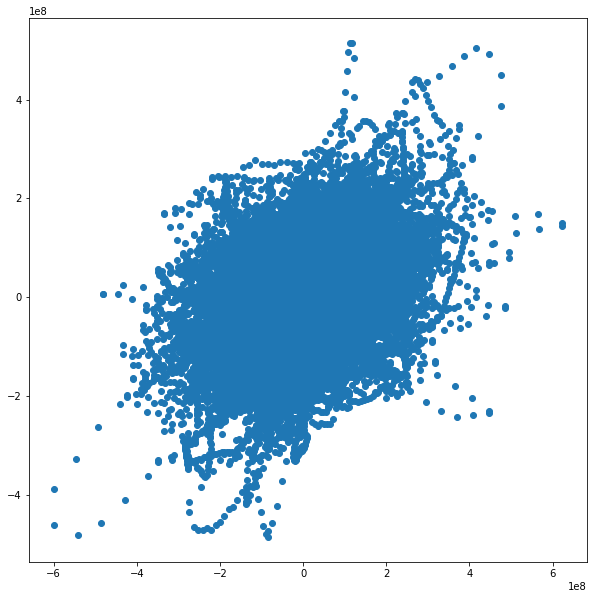

(21, 3890)


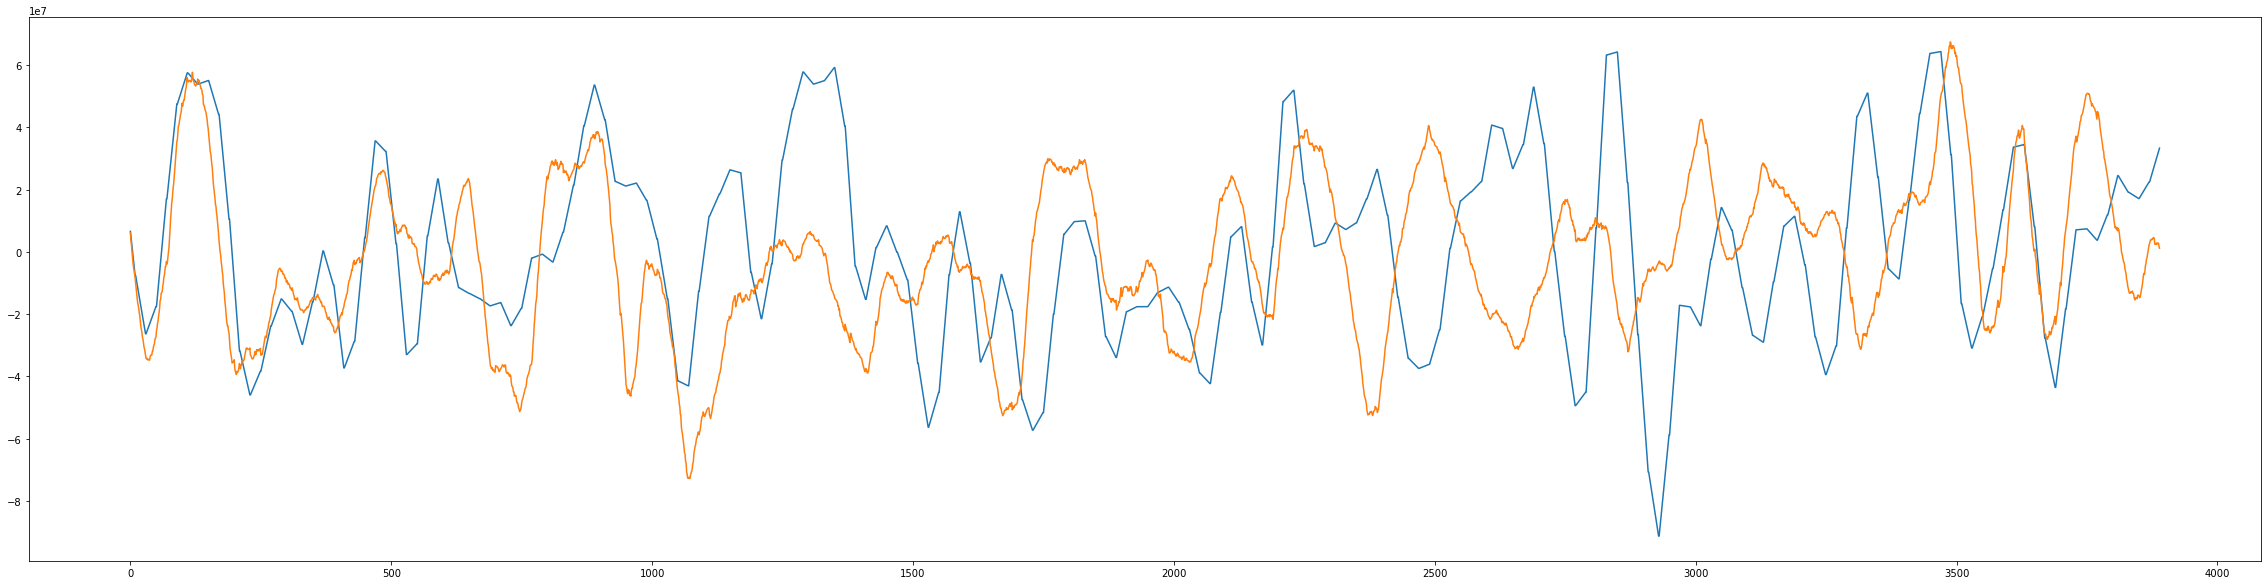

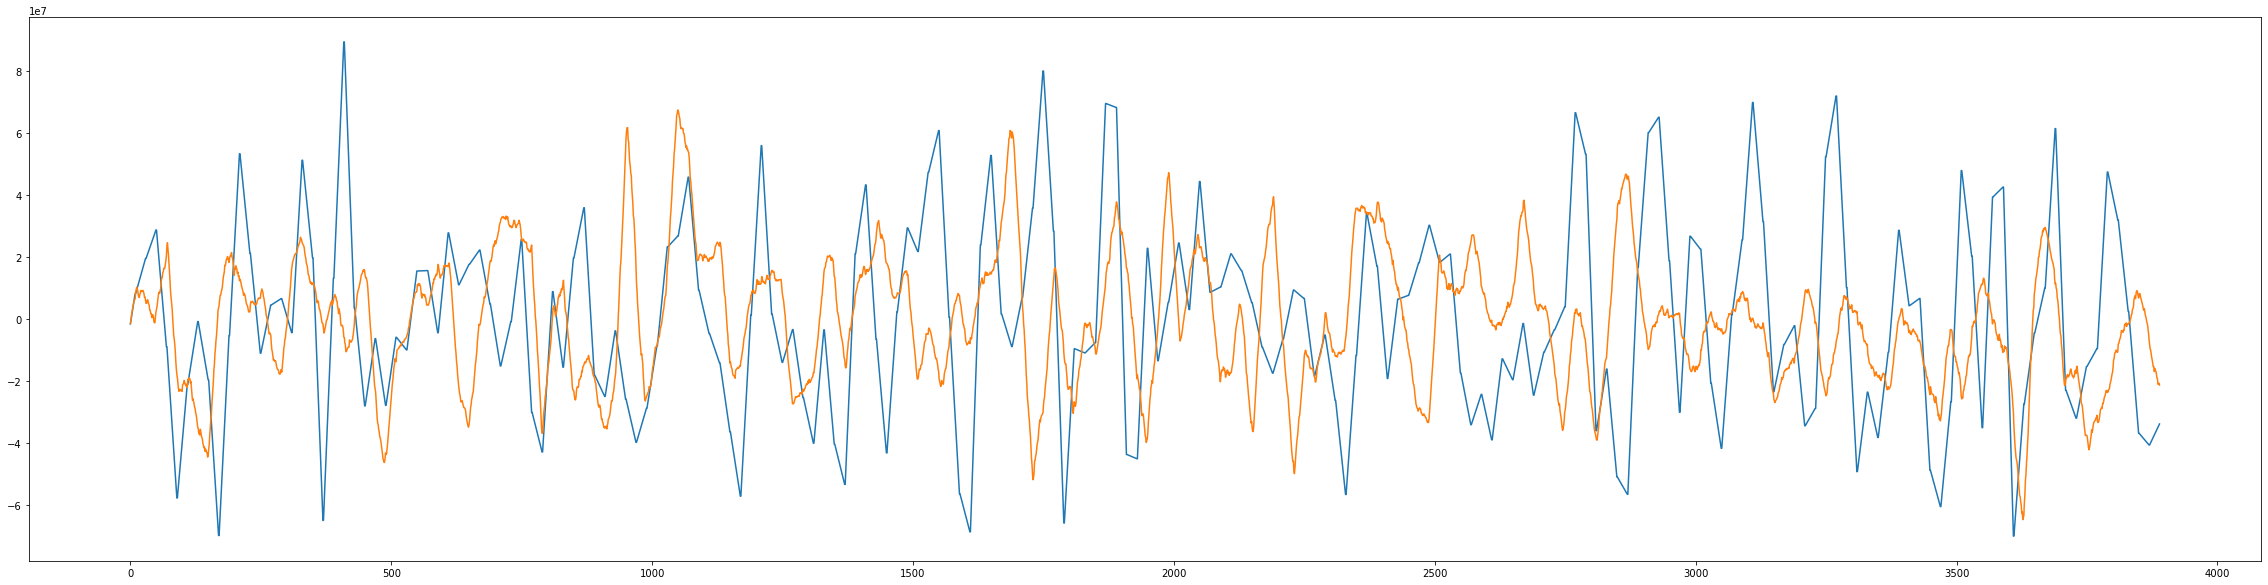

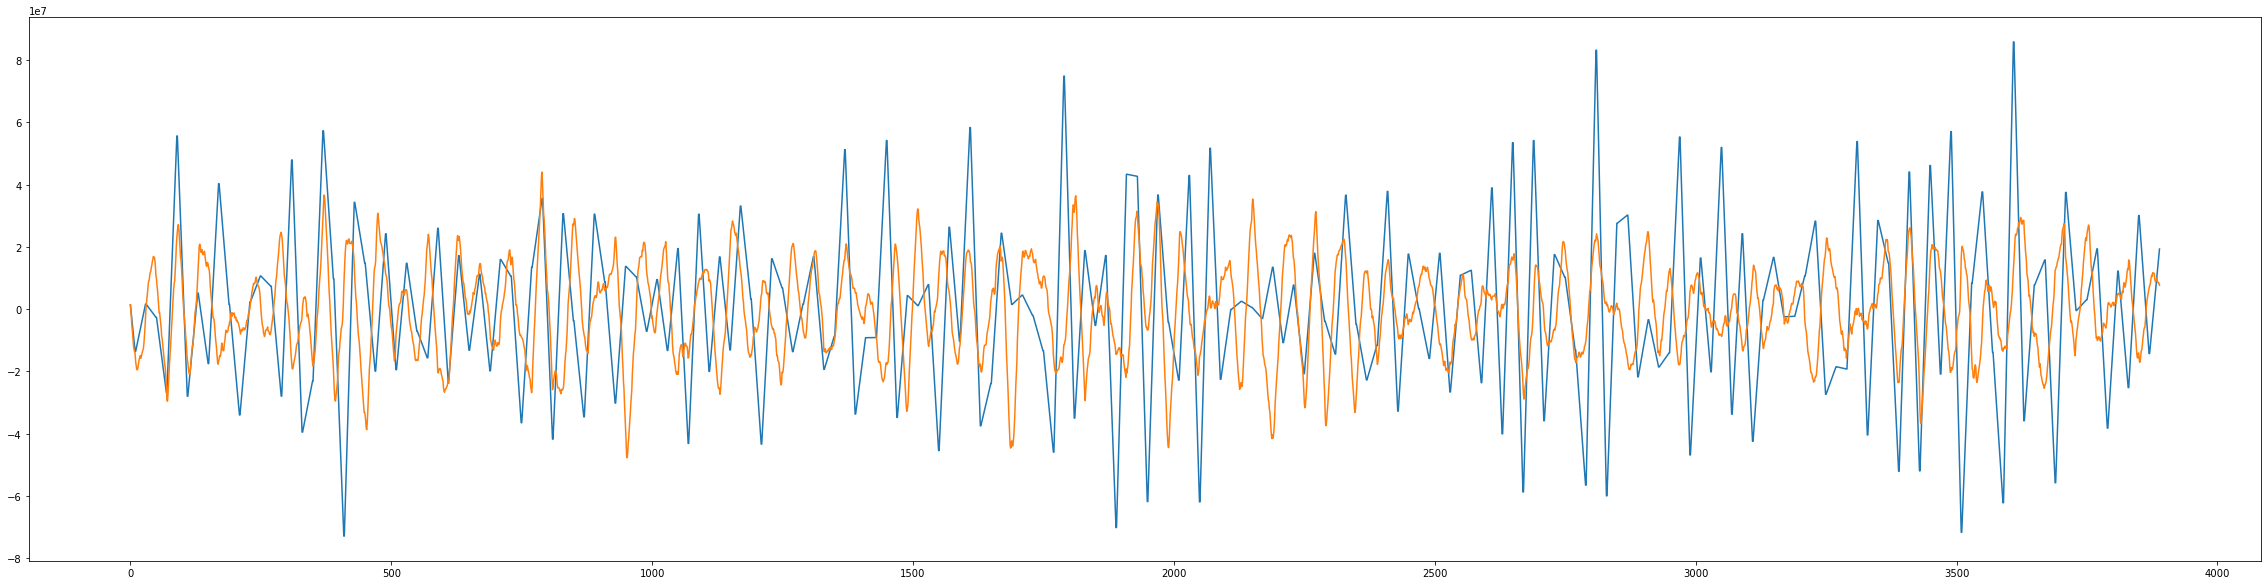

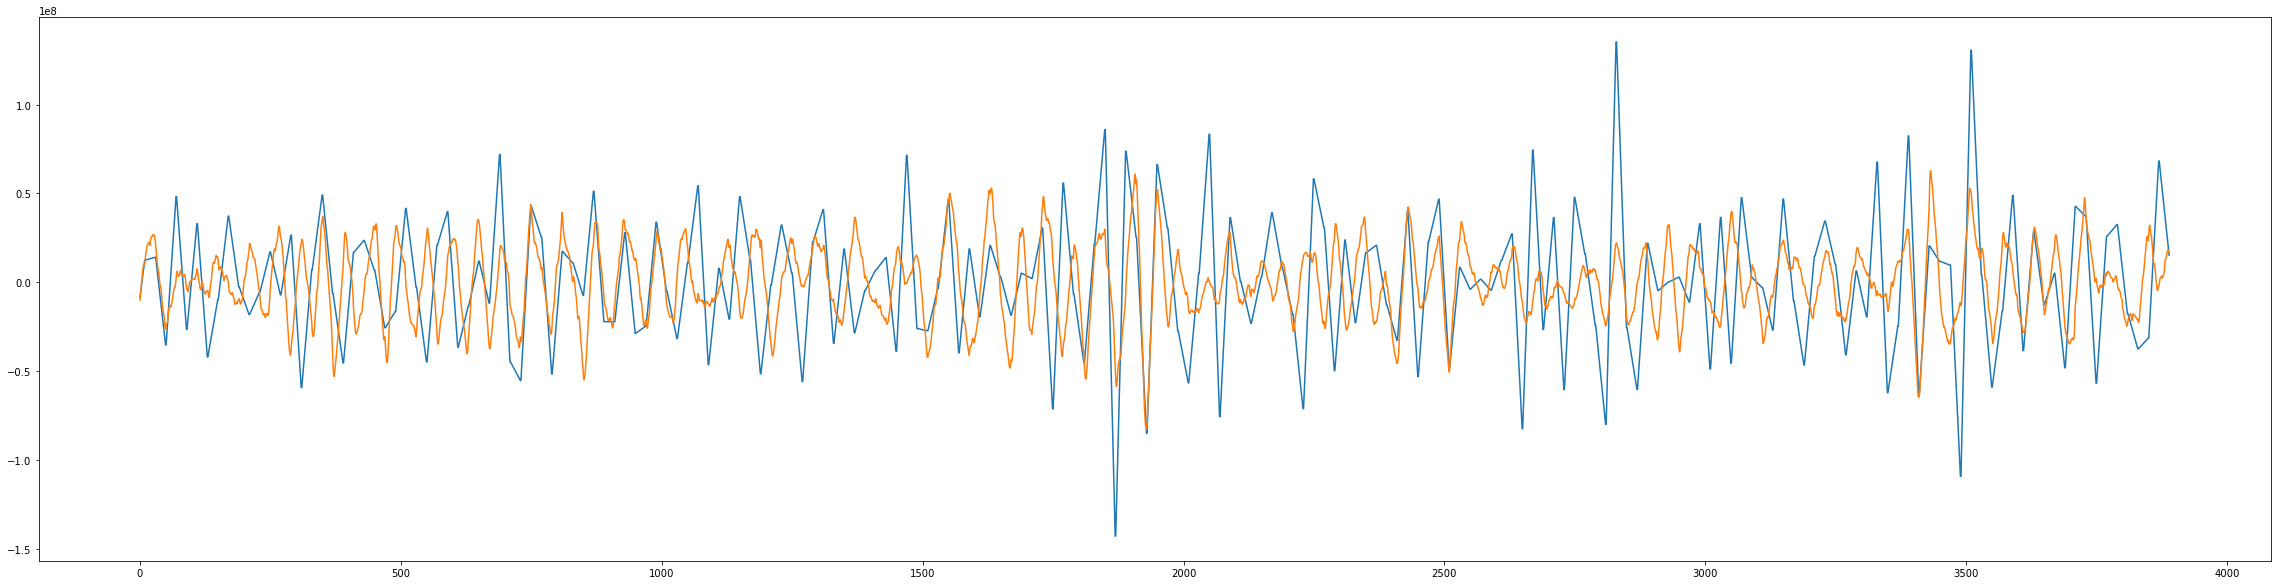

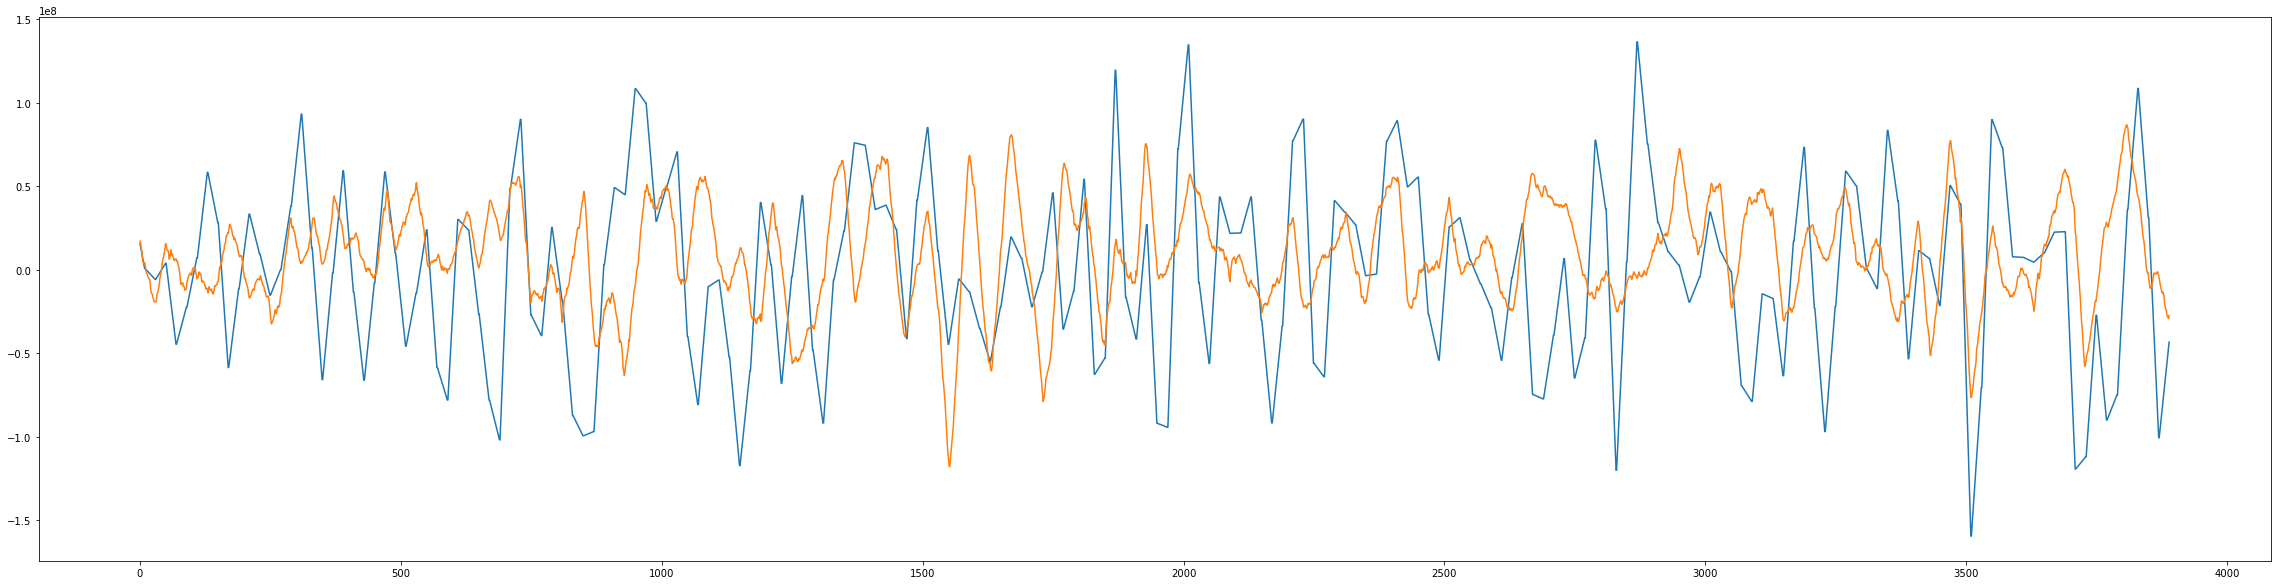

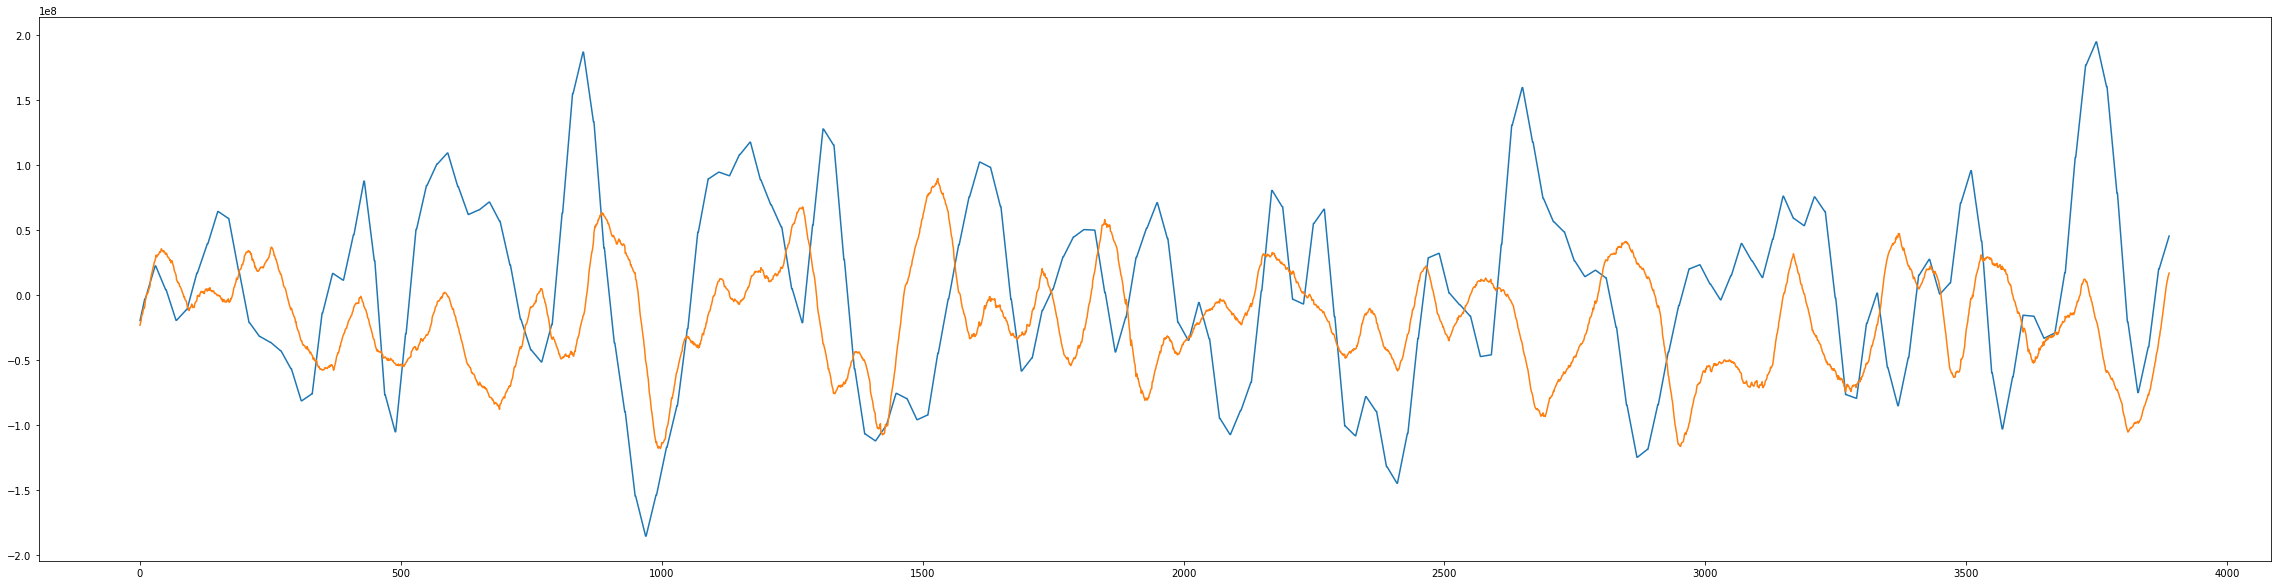

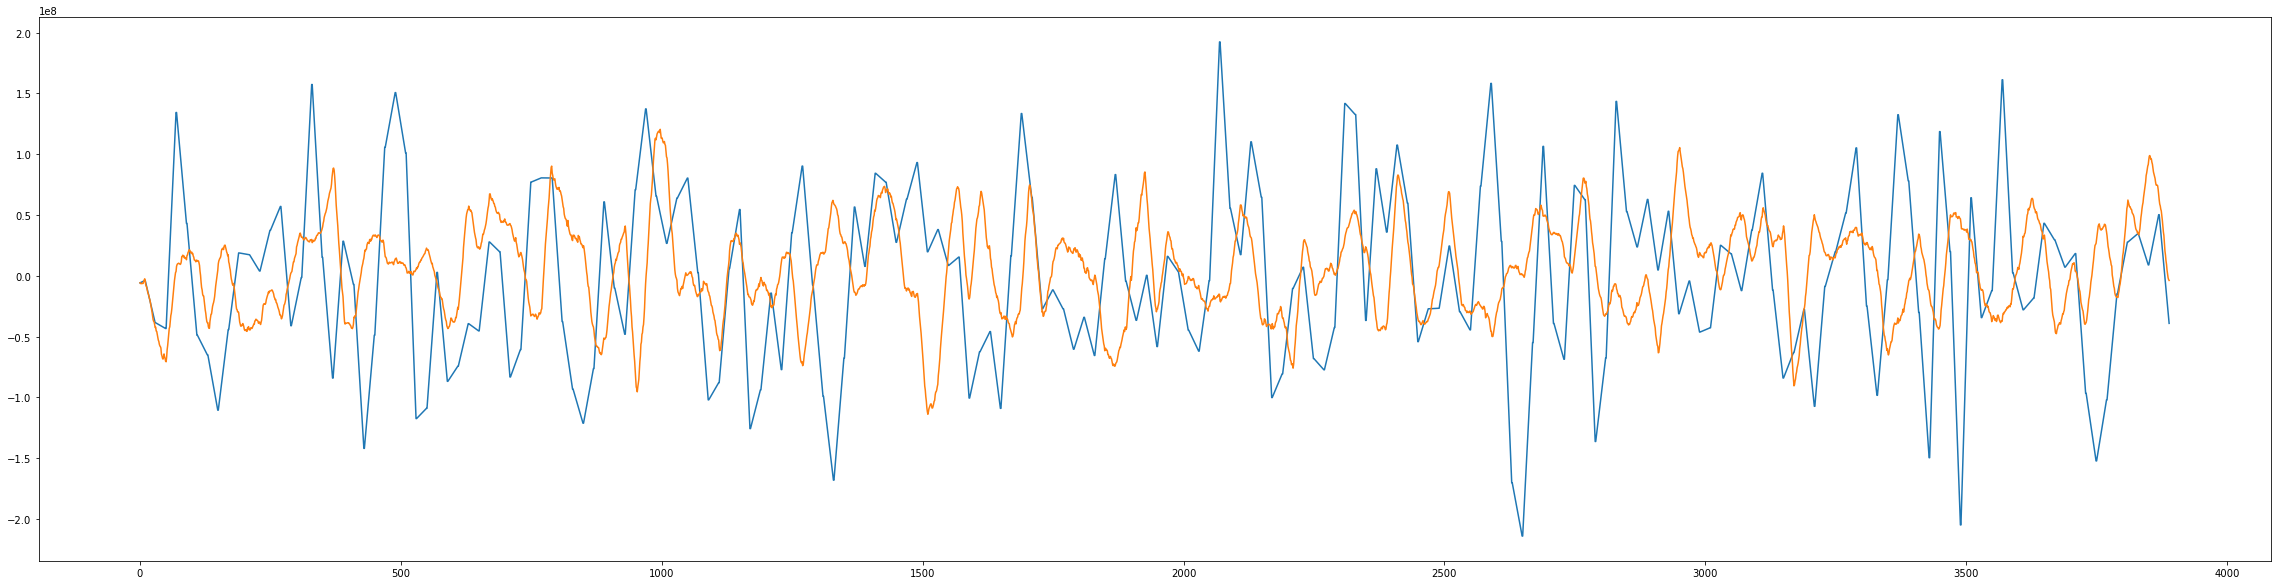

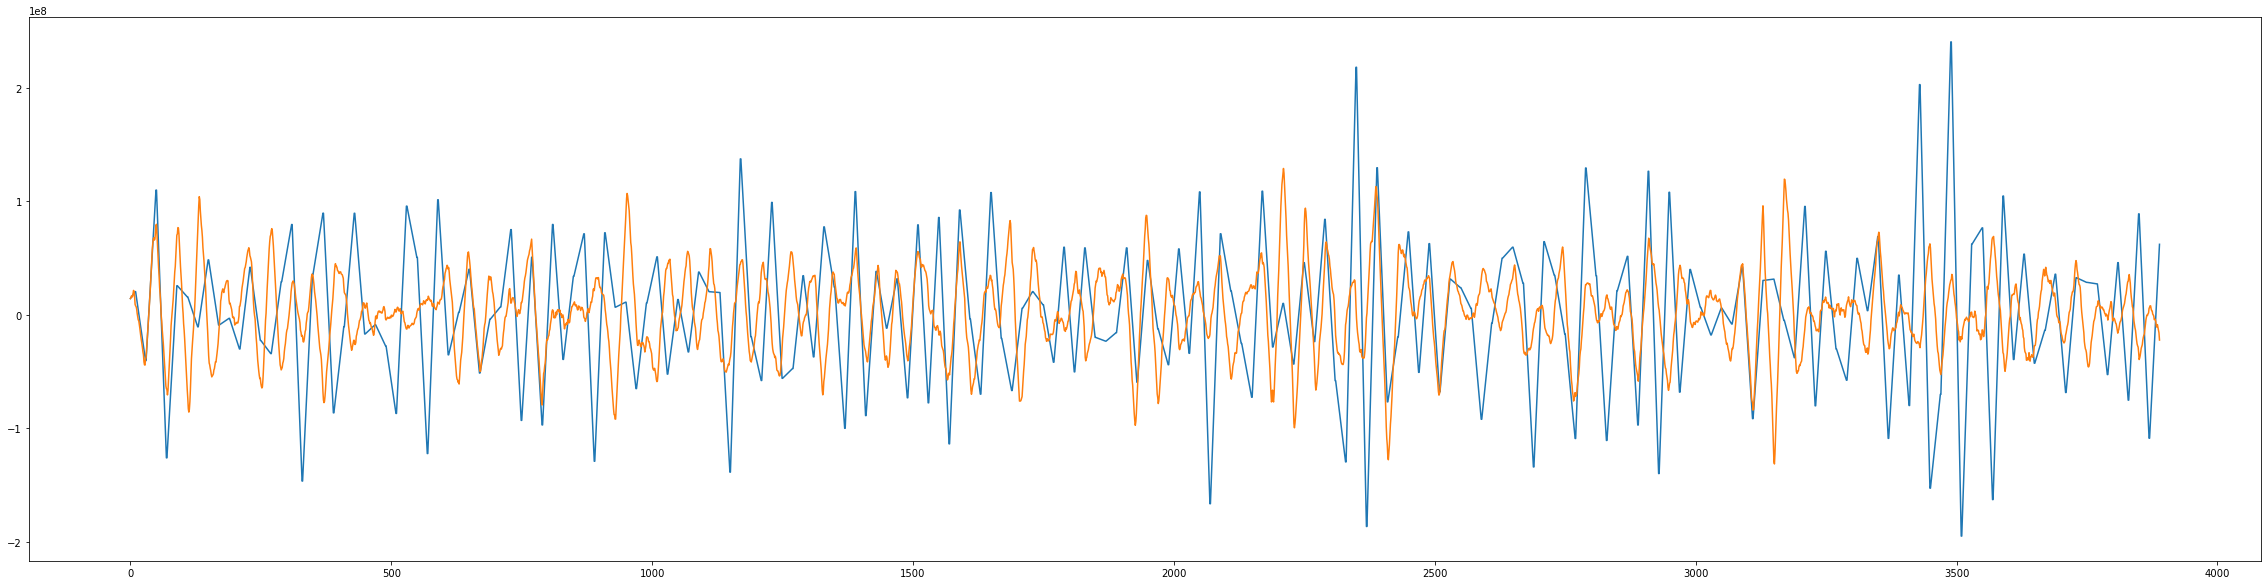

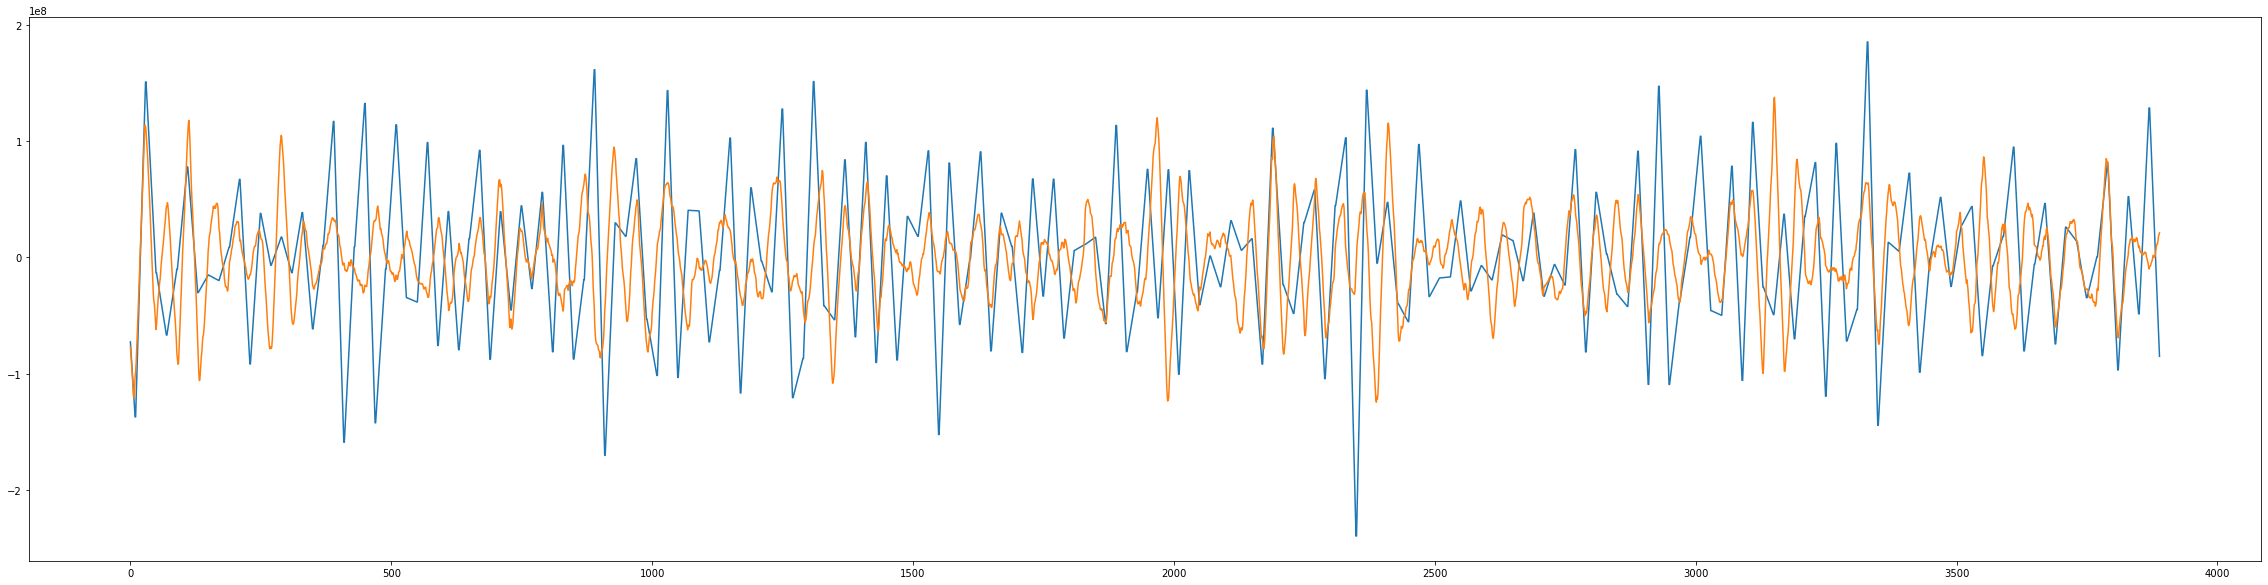

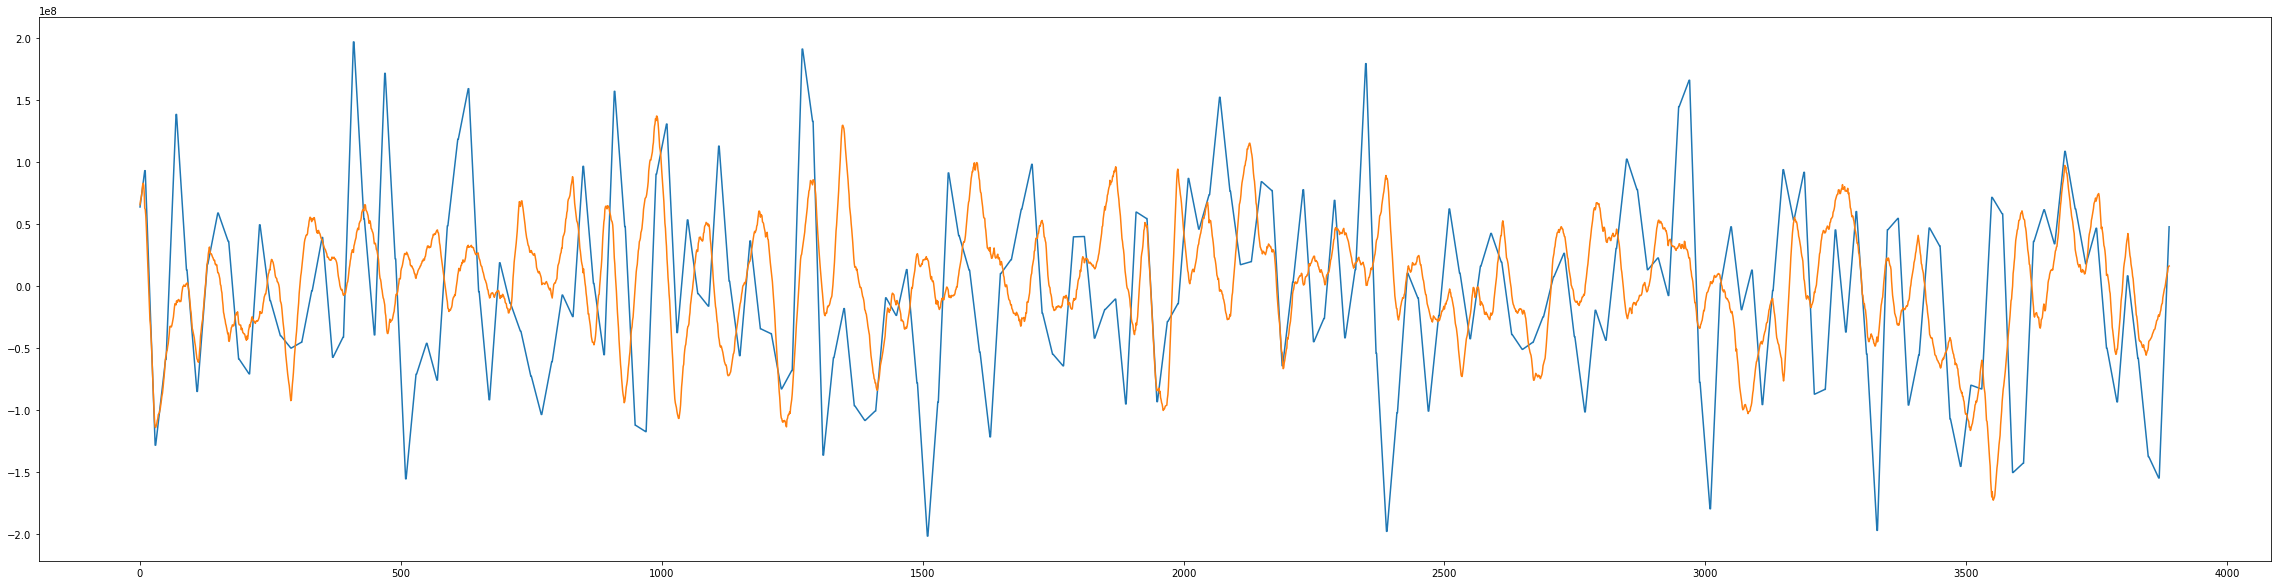

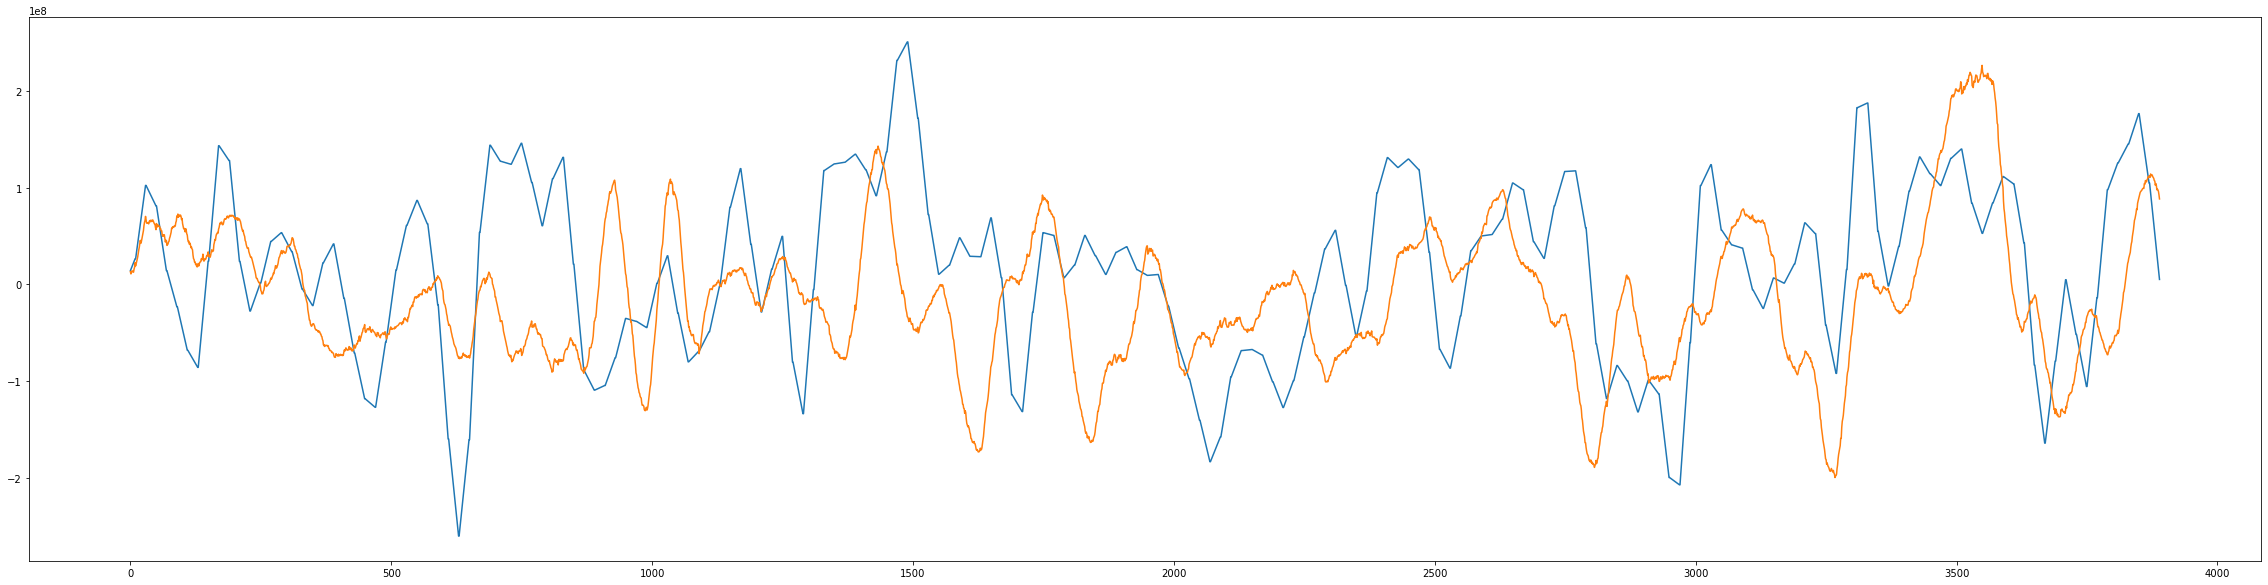

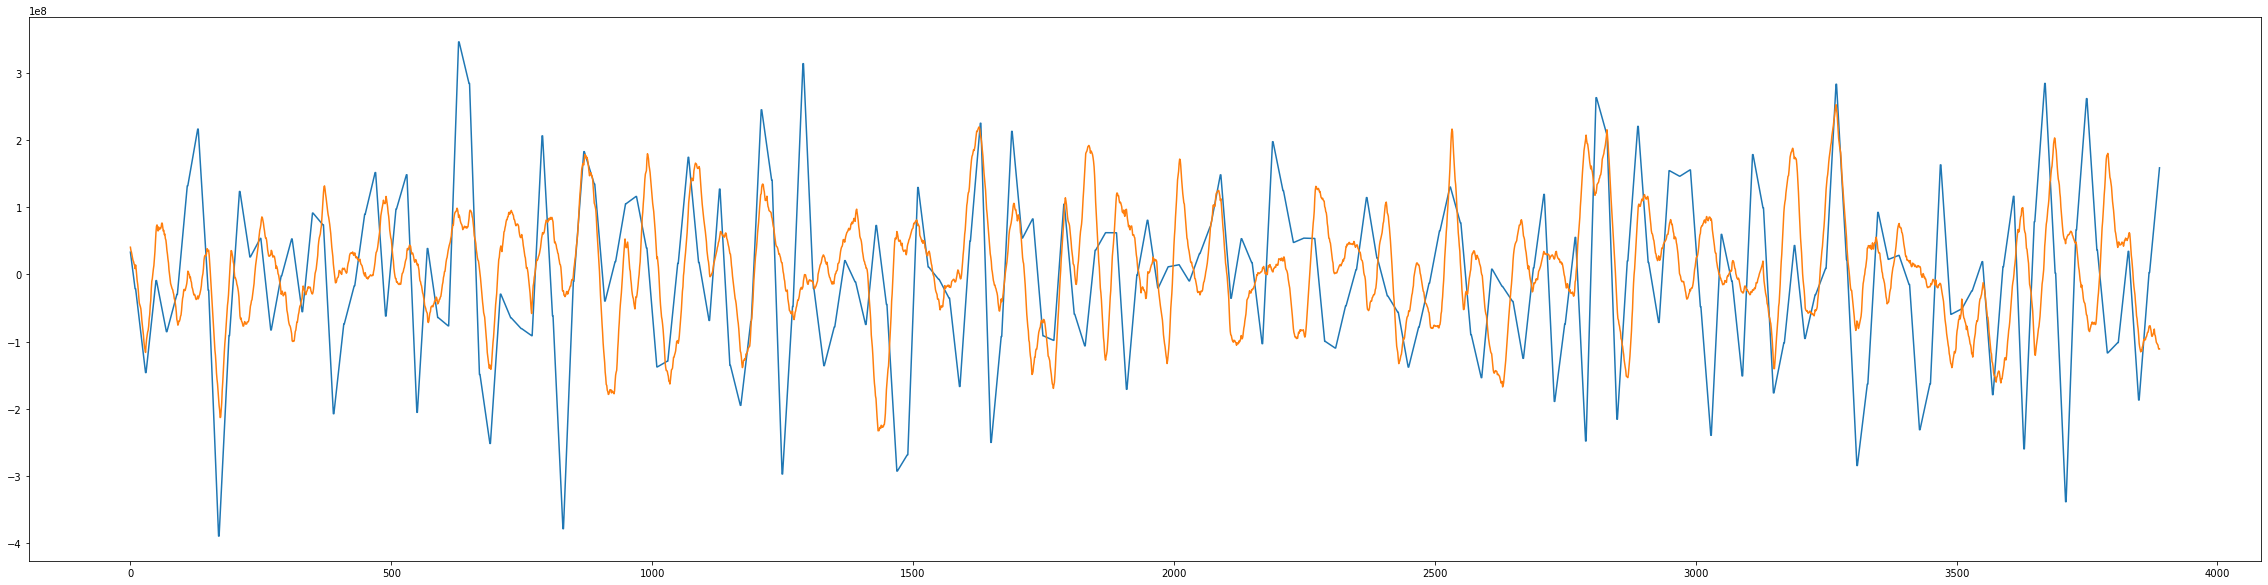

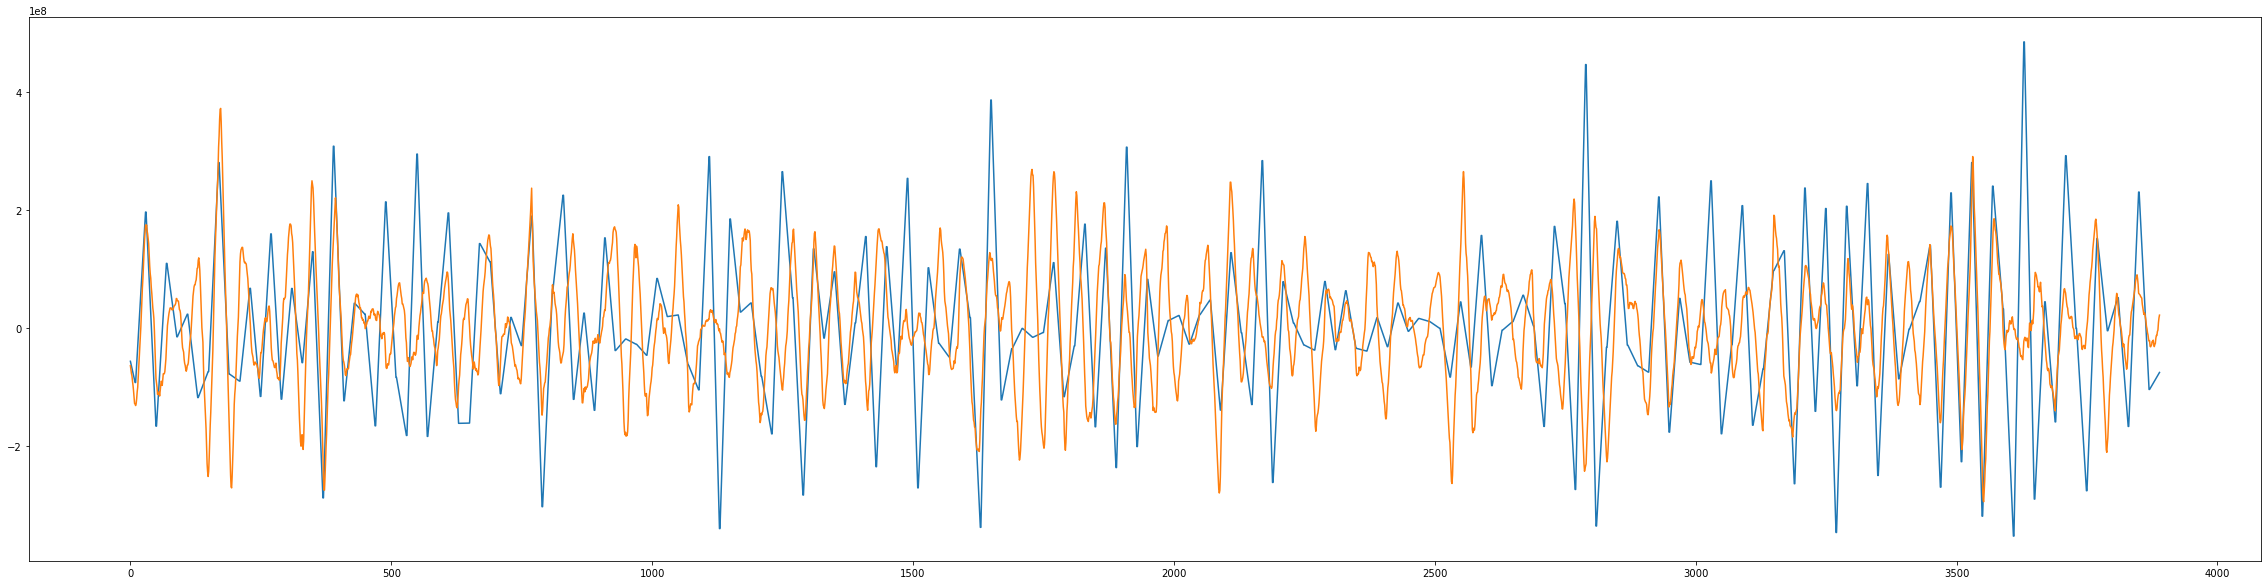

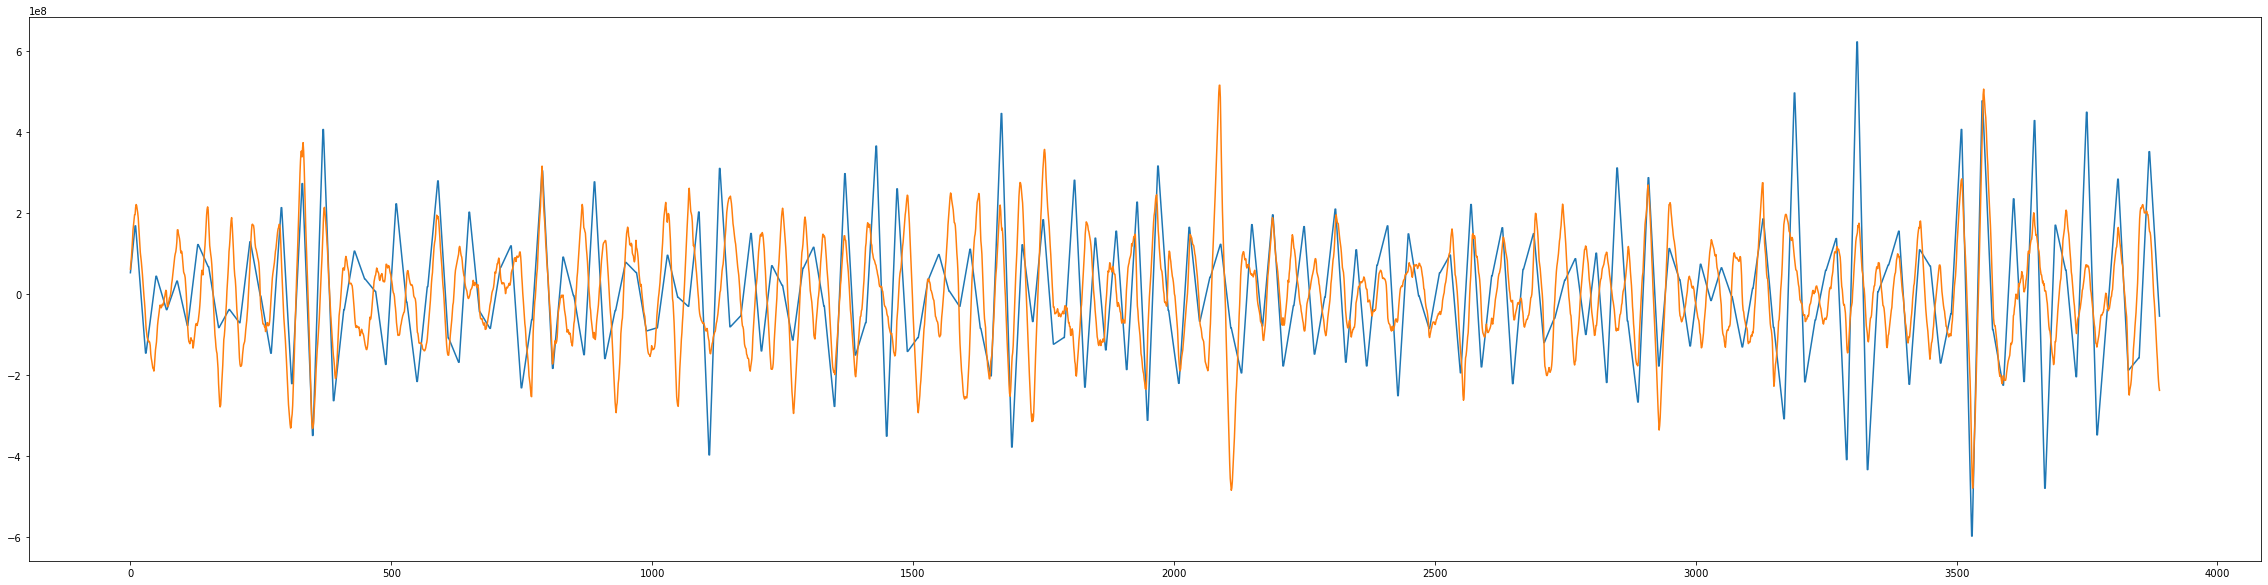

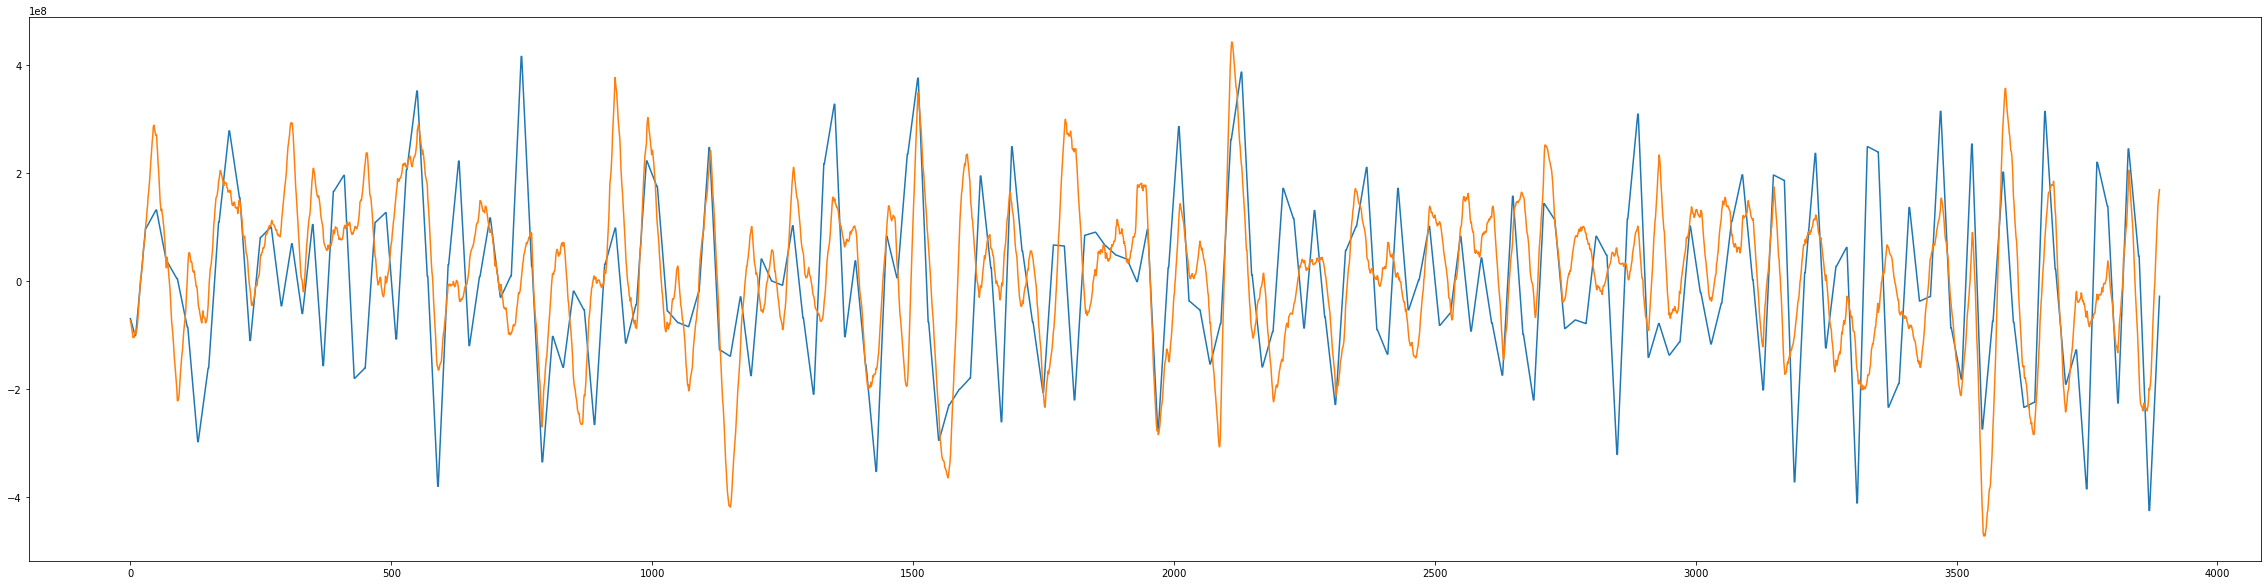

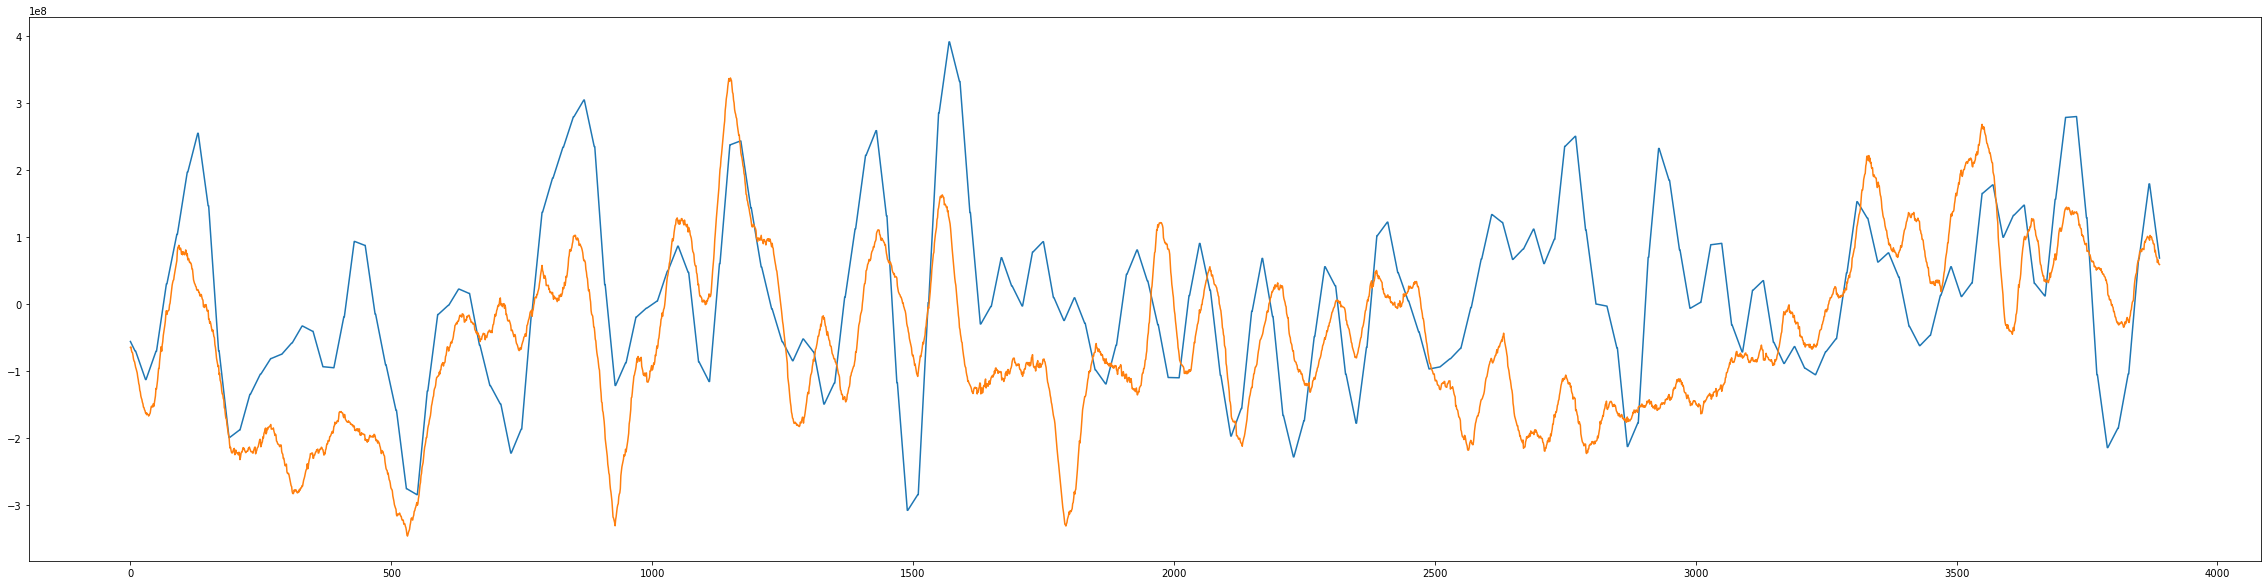

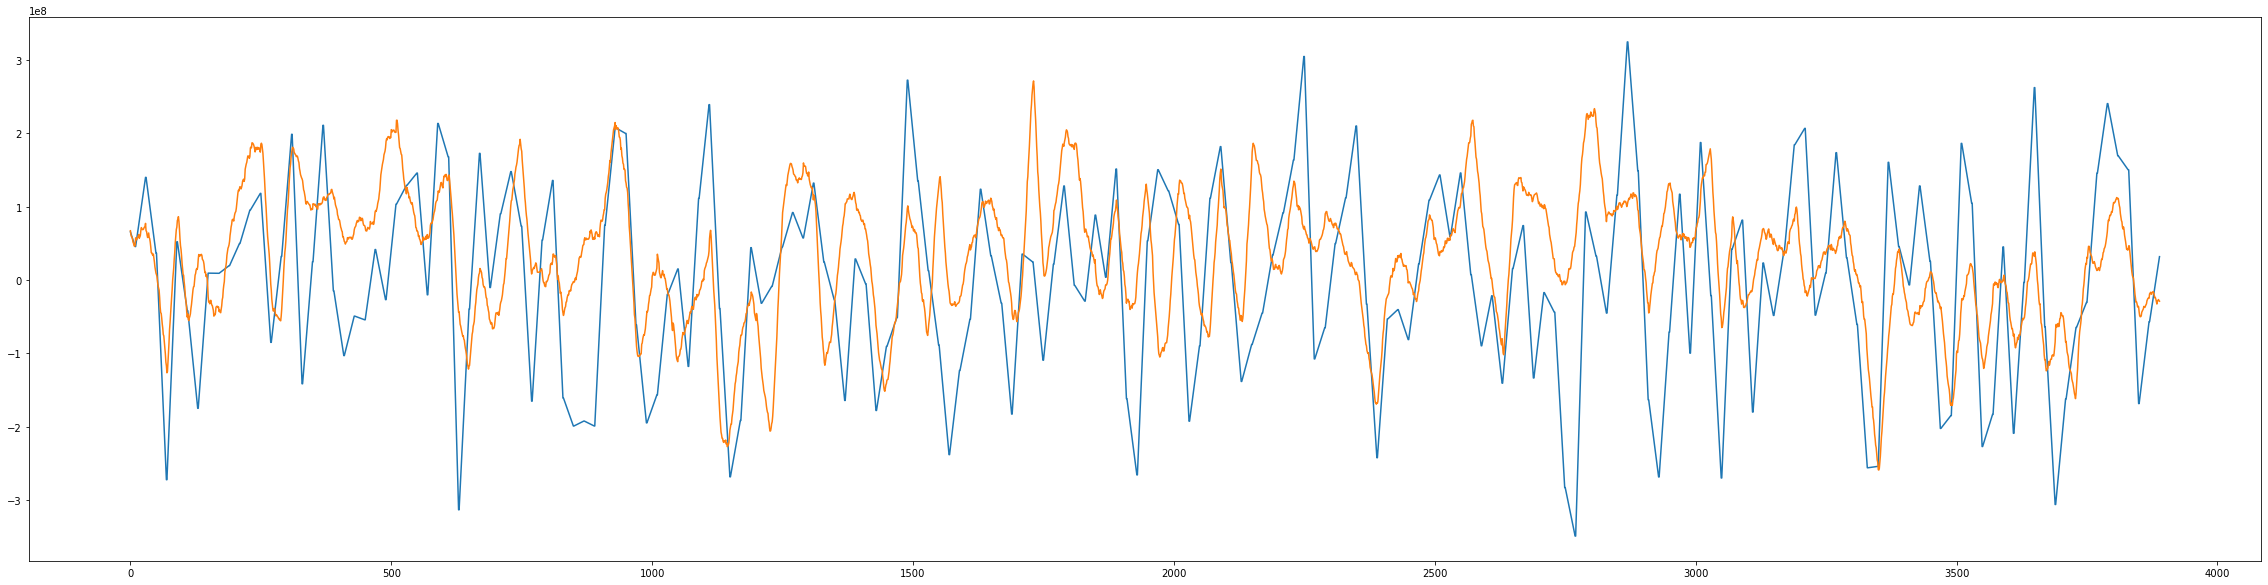

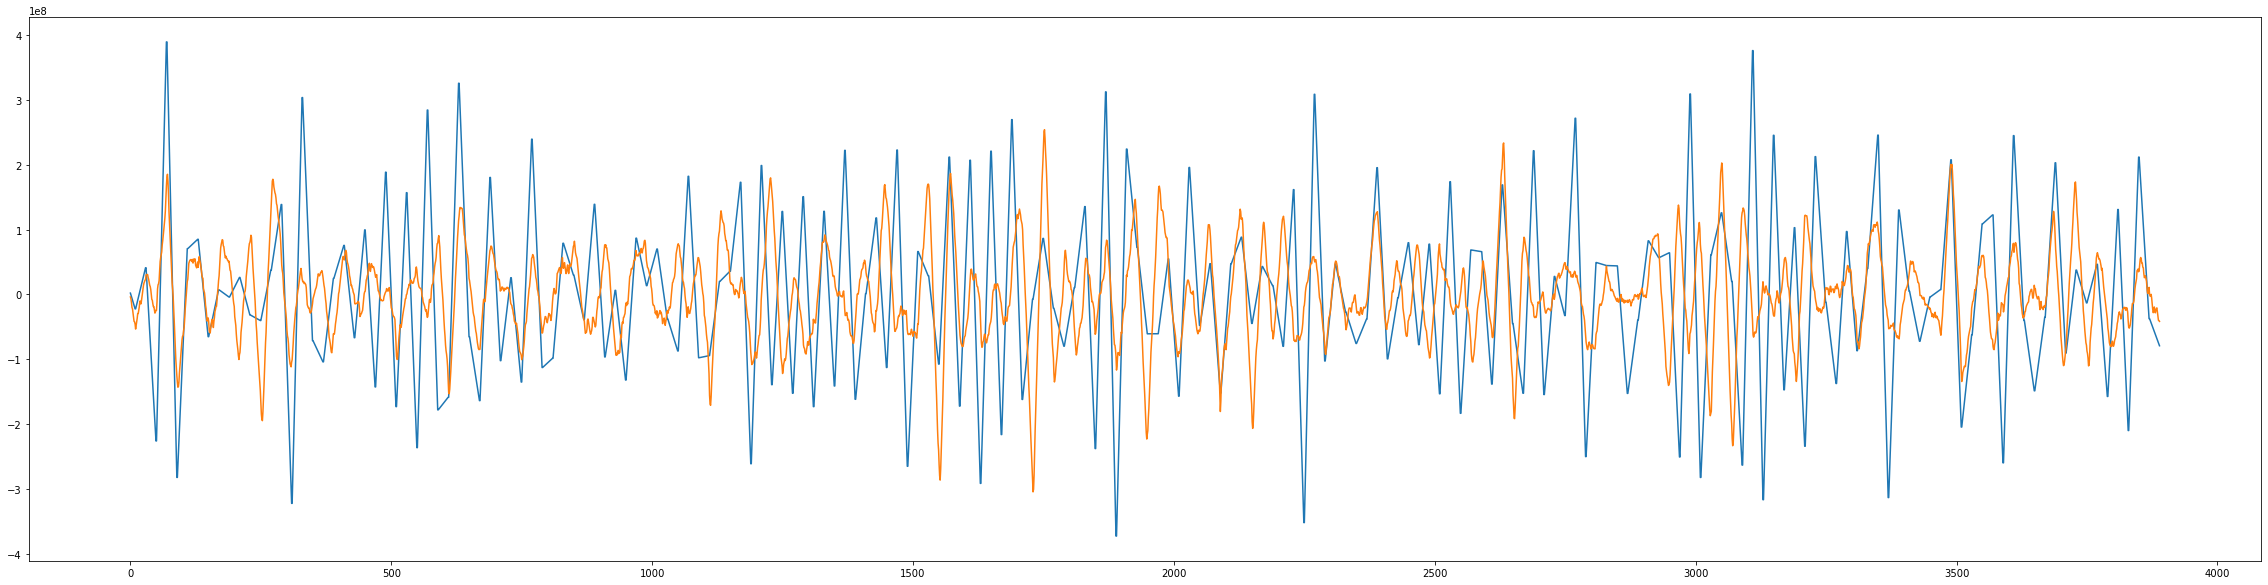

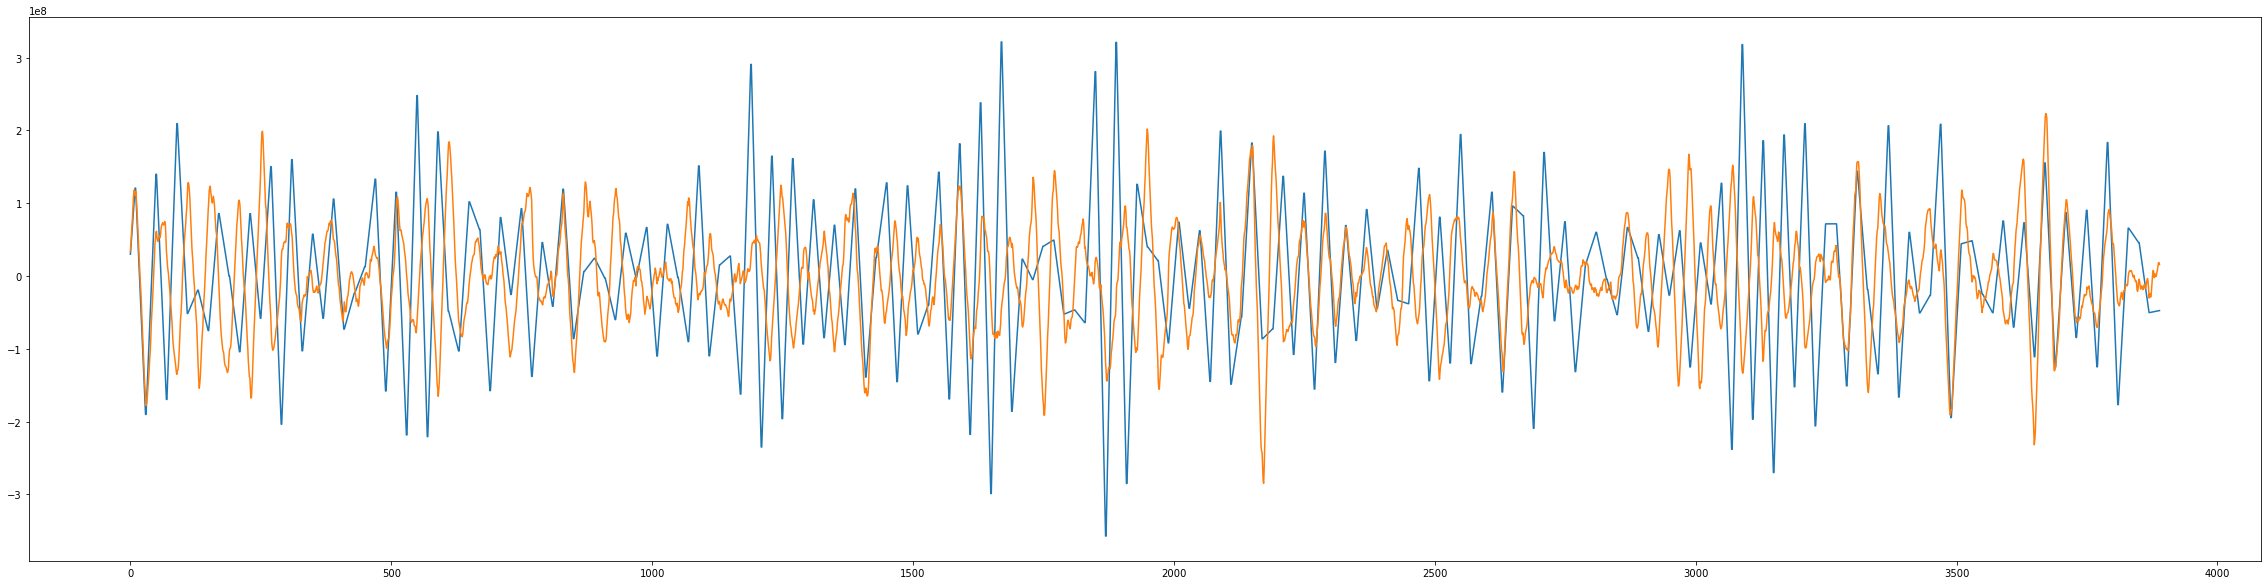

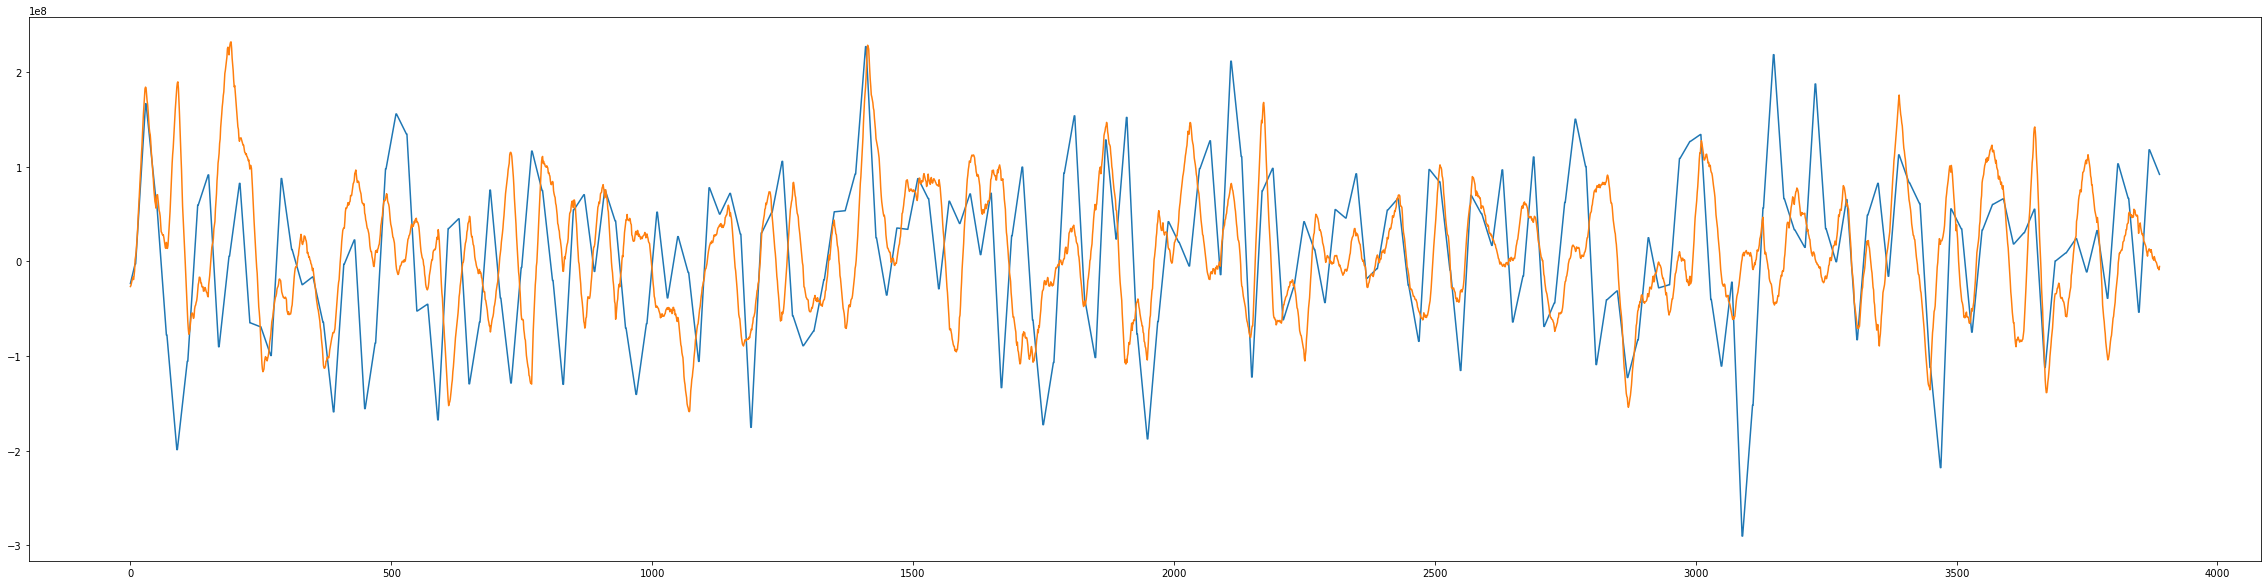

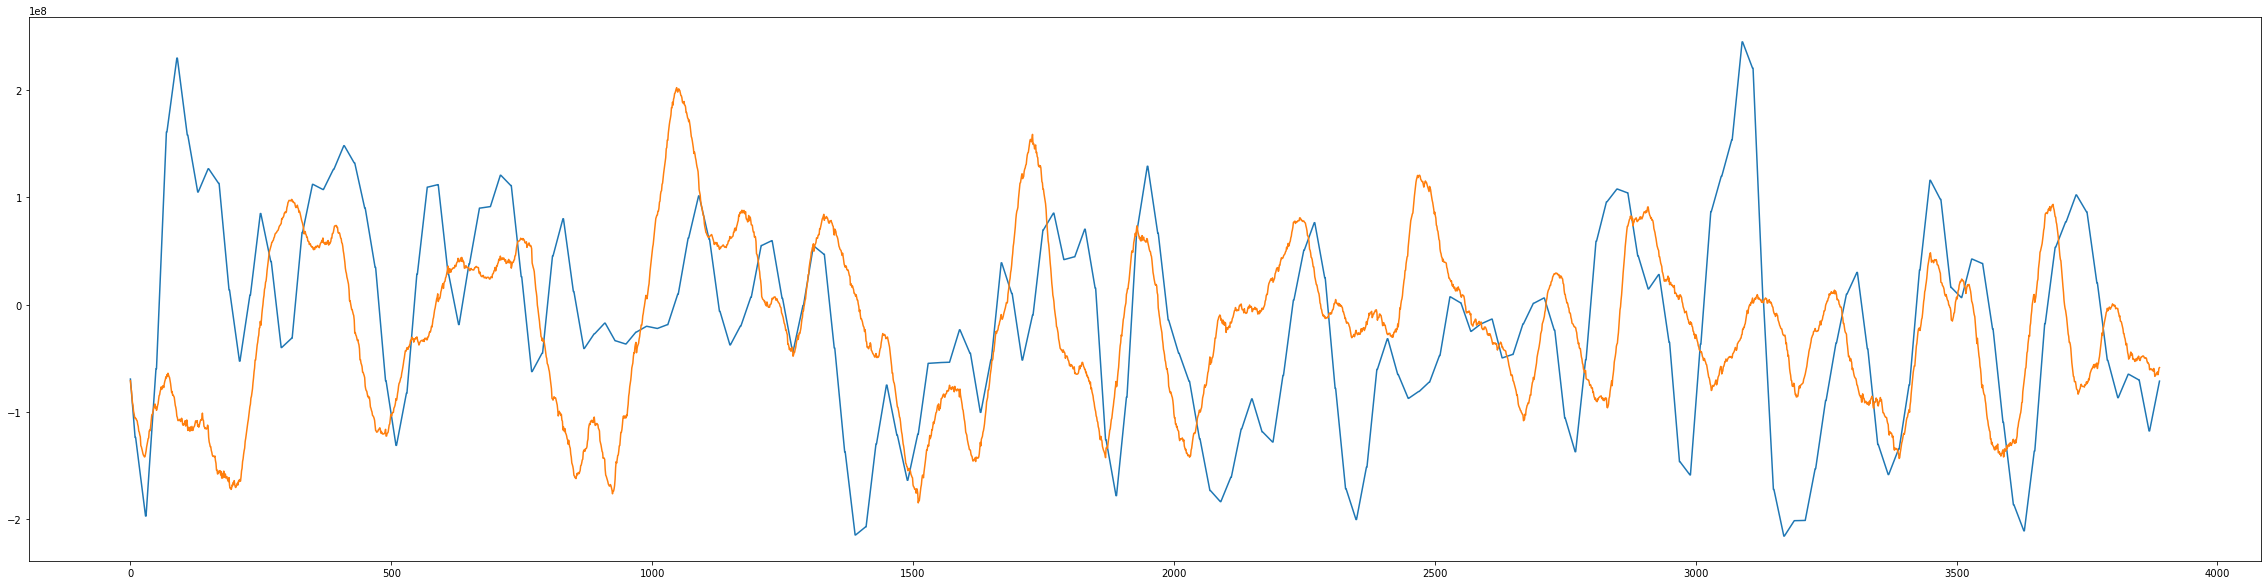

In [48]:
for k in testing_data_index:
    real_result_path=str(result_path)+'/predict to predict'
    if os.path.exists(real_result_path):
        print('The directory already exists')
    else:
        os.mkdir(real_result_path)
        
    case_result_path=str(real_result_path)+'/case0'+str(k)  
    if os.path.exists(case_result_path):
        print('The directory already exists')
    else:
        os.mkdir(case_result_path)
    predict_data = np.empty((0,21,10),int)
    for i in range(389):
        if i == 0:
#             input_data = globals()['xl_x_{}case_1ch_imag_test_interp'.format(k)][0:1,:,:]#,globals()['mic_x_{}case_1ch_imag_test_interp'.format(k)]),axis=1)[0:1,:,:]
            input_data = np.concatenate((globals()['xl_x_{}case_1ch_imag_test_interp'.format(k)],globals()['mic_x_{}case_1ch_imag_test_interp'.format(k)]),axis=1)[0:1,:,:]
            print("START")
            print('0{} step'.format(i))
            output_data = fcst2.get_X_preds(input_data)
            predict_data = np.append(predict_data,output_data[0].numpy(),axis=0)
            print(predict_data.shape)
        else: 
            print('0{} step'.format(i))
#             input_data = globals()['xl_x_{}case_1ch_imag_test_interp'.format(k)][i:i+1,:,:]
            input_data = np.concatenate((globals()['xl_x_{}case_1ch_imag_test_interp'.format(k)][i:i+1,:,:],output_data[0][:,:,:]),axis=1)
            print(input_data.shape)
            output_data = fcst2.get_X_preds(input_data)
            predict_data = np.append(predict_data,output_data[0].numpy(),axis=0)
            print(predict_data.shape)
    
    setattr(mod,'mic_test_{}case_only'.format(k), predict_data[:,:,:])
            
    mic_test_1ch_pred = np.empty((0,freq_output),int)
    for l in range(len(predict_data)):
        data = globals()['mic_test_{}case_only'.format(k)][l,:,:].T
        mic_test_1ch_pred = np.append(mic_test_1ch_pred,data,axis=0)
    
    mic_test_1ch_pred_r = np.concatenate((np.zeros((len(mic_test_1ch_pred),60)), mic_test_1ch_pred),axis=1)
    mic_test_1ch_pred_rr = np.concatenate((mic_test_1ch_pred_r,np.zeros((len(mic_test_1ch_pred),400))),axis=1)    
    mic_test_1ch_pred_rrr = mic_allcase_allch_imag_interp_scaler.inverse_transform(mic_test_1ch_pred_rr)

    predd_data = mic_test_1ch_pred_rrr[:,60:81].T
    print(predd_data, predd_data.shape)
    
    plt.figure(figsize=(10,10))
    imag_output_data = globals()['mic_{}case_{}ch_{}_interp_raw'.format(k,1,2)][10:,60:81].T
    plt.scatter(imag_output_data.reshape(-1,1),predd_data.reshape(-1,1))
    plt.show()
    print(imag_output_data.shape)
    
    for i in range(21):
        plt.figure(figsize=(40,10))
        plt.plot(imag_output_data[i,:])
        plt.plot(predd_data[i,:])
        plt.show()
        
    np.savetxt(str(case_result_path)+'/y_{}case_test_1ch_imag_data.dat'.format(k),predd_data, delimiter=",")